In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas_profiling

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [49]:
DATA_DIR = '../input/'

In [50]:
df = pd.read_pickle("../input/orgn/folds/train_folds.pkl")
print(df.shape)
df.head()

(473, 68)


,id,height,weight,nth_year,is_youth,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,team,position,birthdate,salary,nationality,prev3_team,prev2_team,prev1_team,prev3_div,prev2_div,prev1_div,prev3_num_played,prev2_num_played,prev1_num_played,prev3_scores,prev2_scores,prev1_scores,prev3_time_played,prev2_time_played,prev1_time_played,label,height_prev_year,weight_prev_year,nth_year_prev_year,is_youth_prev_year,j1_total_num_played_prev_year,j1_total_scores_prev_year,j2_total_num_played_prev_year,j2_total_scores_prev_year,j3_total_num_played_prev_year,j3_total_scores_prev_year,na_total_num_played_prev_year,na_total_scores_prev_year,team_prev_year,position_prev_year,birthdate_prev_year,salary_prev_year,nationality_prev_year,prev3_team_prev_year,prev2_team_prev_year,prev1_team_prev_year,prev3_div_prev_year,prev2_div_prev_year,prev1_div_prev_year,prev3_num_played_prev_year,prev2_num_played_prev_year,prev1_num_played_prev_year,prev3_scores_prev_year,prev2_scores_prev_year,prev1_scores_prev_year,prev3_time_played_prev_year,prev2_time_played_prev_year,prev1_time_played_prev_year,time_played_prev_year,kfold
0,117,172.0,68.0,9,1.0,181.0,30.0,57.0,16.0,NaN,NaN,1.0,0.0,G大阪,MF,1988-11-26 00:00:00,4500,NaN,G大阪,G大阪,G大阪,1,1,1,30,31,34,6,5,2,1726,2193,2201,2921.0,176.0,73.0,7.0,NaN,276.0,45.0,31.0,4.0,NaN,NaN,7.0,0.0,浦和,MF,1987-12-15,7000,NaN,浦和,浦和,浦和,1,1,1,34,33,33,8,3,5,2903,2882,2834,2712.0,0
1,166,169.0,67.0,10,NaN,237.0,30.0,NaN,NaN,NaN,NaN,1.0,0.0,浦和,MF,1987-02-23 00:00:00,5000,NaN,浦和,浦和,浦和,1,1,1,33,31,19,4,8,1,1947,1743,695,355.0,177.0,72.0,1.0,NaN,31.0,3.0,48.0,4.0,2.0,0.0,NaN,NaN,横浜FM,FW,1994-11-17,1200,NaN,東京V,東京V,松本,2,2,1,18,26,31,1,3,3,800,1483,1685,649.0,0
2,68,183.0,78.0,3,NaN,385.0,152.0,37.0,17.0,NaN,NaN,33.0,10.0,FC東京,FW,1981-10-09 00:00:00,5000,NaN,磐田,FC東京,FC東京,2,1,1,37,30,29,17,9,6,3233,2209,2050,1160.0,176.0,71.0,3.0,NaN,79.0,1.0,109.0,20.0,NaN,NaN,2.0,0.0,G大阪,DF,1988-05-17,3000,NaN,千葉,G大阪,G大阪,2,1,1,40,21,31,6,1,2,3486,1532,2454,1694.0,0
3,587,175.0,67.0,2,NaN,31.0,8.0,42.0,13.0,NaN,NaN,NaN,NaN,大宮,MF,1992-05-31 00:00:00,1300,NaN,NaN,群馬,大宮,NaN,2,1,NaN,42,31,NaN,13,8,NaN,3682,2091,2997.0,178.0,71.0,1.0,NaN,NaN,NaN,156.0,31.0,NaN,NaN,NaN,NaN,磐田,FW,1988-11-21,1500,NaN,熊本,熊本,熊本,2,2,2,37,41,41,8,7,12,2736,3616,3598,527.0,0
4,400,175.0,70.0,5,NaN,291.0,35.0,37.0,6.0,NaN,NaN,NaN,NaN,新潟,MF,1984-05-31 00:00:00,2000,NaN,新潟,新潟,新潟,1,1,1,23,26,18,3,1,2,1376,902,798,349.0,188.0,80.0,2.0,NaN,51.0,0.0,23.0,0.0,NaN,NaN,0.0,0.0,仙台,GK,1987-04-10,1800,NaN,横浜FM,横浜FM,仙台,1,1,1,2,0,32,0,0,0,105,0,2880,1163.0,0


In [51]:
CONT_COLS = [
     'height',
     'weight',
     'nth_year',
     'is_youth',
     'j1_total_num_played',
     'j1_total_scores',
     'j2_total_num_played',
     'j2_total_scores',
     'j3_total_num_played',
     'j3_total_scores',
     'na_total_num_played',
     'na_total_scores',
     'prev3_num_played',
     'prev2_num_played',
     'prev1_num_played',
     'prev3_scores',
     'prev2_scores',
     'prev1_scores',
     'prev3_time_played',
     'prev2_time_played',
     'prev1_time_played',
     'height_prev_year',
     'weight_prev_year',
     'nth_year_prev_year',
     'is_youth_prev_year',
     'j1_total_num_played_prev_year',
     'j1_total_scores_prev_year',
     'j2_total_num_played_prev_year',
     'j2_total_scores_prev_year',
     'j3_total_num_played_prev_year',
     'j3_total_scores_prev_year',
     'na_total_num_played_prev_year',
     'na_total_scores_prev_year',
     'prev3_num_played_prev_year',
     'prev2_num_played_prev_year',
     'prev1_num_played_prev_year',
     'prev3_scores_prev_year',
     'prev2_scores_prev_year',
     'prev1_scores_prev_year',
     'prev3_time_played_prev_year',
     'prev2_time_played_prev_year',
     'prev1_time_played_prev_year'
]

CAT_COLS = [
    'team',
    'position',
    'birthdate',
    'salary',
    'nationality',
    'prev3_team',
    'prev2_team',
    'prev1_team',
    'prev3_div',
    'prev2_div',
    'prev1_div',
    'team_prev_year',
    'position_prev_year',
    'salary_prev_year',
    'nationality_prev_year',
    'prev3_team_prev_year',
    'prev2_team_prev_year',
    'prev1_team_prev_year',
    'prev3_div_prev_year',
    'prev2_div_prev_year',
    'prev1_div_prev_year',
]

In [52]:
df[CONT_COLS]

,height,weight,nth_year,is_youth,j1_total_num_played,j1_total_scores,j2_total_num_played,j2_total_scores,j3_total_num_played,j3_total_scores,na_total_num_played,na_total_scores,prev3_num_played,prev2_num_played,prev1_num_played,prev3_scores,prev2_scores,prev1_scores,prev3_time_played,prev2_time_played,prev1_time_played,height_prev_year,weight_prev_year,nth_year_prev_year,is_youth_prev_year,j1_total_num_played_prev_year,j1_total_scores_prev_year,j2_total_num_played_prev_year,j2_total_scores_prev_year,j3_total_num_played_prev_year,j3_total_scores_prev_year,na_total_num_played_prev_year,na_total_scores_prev_year,prev3_num_played_prev_year,prev2_num_played_prev_year,prev1_num_played_prev_year,prev3_scores_prev_year,prev2_scores_prev_year,prev1_scores_prev_year,prev3_time_played_prev_year,prev2_time_played_prev_year,prev1_time_played_prev_year
0,172.0,68.0,9,1.0,181.0,30.0,57.0,16.0,NaN,NaN,1.0,0.0,30,31,34,6,5,2,1726,2193,2201,176.0,73.0,7.0,NaN,276.0,45.0,31.0,4.0,NaN,NaN,7.0,0.0,34,33,33,8,3,5,2903,2882,2834
1,169.0,67.0,10,NaN,237.0,30.0,NaN,NaN,NaN,NaN,1.0,0.0,33,31,19,4,8,1,1947,1743,695,177.0,72.0,1.0,NaN,31.0,3.0,48.0,4.0,2.0,0.0,NaN,NaN,18,26,31,1,3,3,800,1483,1685
2,183.0,78.0,3,NaN,385.0,152.0,37.0,17.0,NaN,NaN,33.0,10.0,37,30,29,17,9,6,3233,2209,2050,176.0,71.0,3.0,NaN,79.0,1.0,109.0,20.0,NaN,NaN,2.0,0.0,40,21,31,6,1,2,3486,1532,2454
3,175.0,67.0,2,NaN,31.0,8.0,42.0,13.0,NaN,NaN,NaN,NaN,NaN,42,31,NaN,13,8,NaN,3682,2091,178.0,71.0,1.0,NaN,NaN,NaN,156.0,31.0,NaN,NaN,NaN,NaN,37,41,41,8,7,12,2736,3616,3598
4,175.0,70.0,5,NaN,291.0,35.0,37.0,6.0,NaN,NaN,NaN,NaN,23,26,18,3,1,2,1376,902,798,188.0,80.0,2.0,NaN,51.0,0.0,23.0,0.0,NaN,NaN,0.0,0.0,2,0,32,0,0,0,105,0,2880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,178.0,75.0,2,NaN,22.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,18,NaN,1,5,NaN,59,868,170.0,65.0,3.0,NaN,0.0,0.0,NaN,NaN,19.0,0.0,NaN,NaN,NaN,0,0,NaN,0,0,NaN,0,0
469,187.0,84.0,2,NaN,34.0,0.0,NaN,NaN,NaN,NaN,22.0,0.0,29,32,34,0,0,0,NaN,NaN,3060,170.0,73.0,4.0,NaN,338.0,156.0,29.0,18.0,NaN,NaN,60.0,6.0,33,32,32,26,18,23,2967,2879,2868
470,170.0,68.0,1,NaN,105.0,16.0,30.0,5.0,2.0,0.0,NaN,NaN,30,33,27,7,4,3,2274,1967,1731,171.0,68.0,2.0,NaN,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,36,38,8,21,15,1,NaN,NaN,414
471,155.0,60.0,3,1.0,34.0,2.0,3.0,0.0,4.0,0.0,NaN,NaN,3,5,22,0,1,1,70,232,1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from sklearn.preprocessing import StandardScaler

x = df.copy()
cont_cols = CONT_COLS[:]
cat_cols = CAT_COLS[:]

x[cont_cols] = x[cont_cols].astype("float")
x[cat_cols] = x[cat_cols].astype("object")

# 欠損値補完
x[cont_cols] = x[cont_cols].fillna(x[cont_cols].mean())
x[cat_cols] = x[cat_cols].fillna(x[cat_cols].mode())

# 標準化
scaler = StandardScaler()
x.loc[:, cont_cols] = scaler.fit_transform(x[cont_cols].values)

In [54]:
import torch
torch.tensor(x[CONT_COLS].astype("float").values, dtype=torch.float32)

tensor([[-9.7712e-01, -7.8671e-01,  1.3031e+00,  ...,  1.8744e+00,
          1.6179e+00,  1.5486e+00],
        [-1.4344e+00, -9.4280e-01,  1.5737e+00,  ..., -8.5623e-01,
          4.0600e-02,  2.8968e-01],
        [ 6.9965e-01,  7.7417e-01, -3.2104e-01,  ...,  2.6314e+00,
          9.5845e-02,  1.1322e+00],
        ...,
        [-1.2820e+00, -7.8671e-01, -8.6241e-01,  ..., -2.9523e-16,
         -2.5635e-16, -1.1029e+00],
        [-3.5685e+00, -2.0354e+00, -3.2104e-01,  ..., -2.9523e-16,
         -2.5635e-16,  2.4913e-16],
        [-5.1982e-01, -4.7453e-01,  7.6169e-01,  ..., -2.9523e-16,
         -2.5635e-16,  2.4913e-16]])

In [56]:
(x=='1984-11-18').sum()

id                               0
height                           0
weight                           0
nth_year                         0
is_youth                         0
j1_total_num_played              0
j1_total_scores                  0
j2_total_num_played              0
j2_total_scores                  0
j3_total_num_played              0
j3_total_scores                  0
na_total_num_played              0
na_total_scores                  0
team                             0
position                         0
birthdate                        0
salary                           0
nationality                      0
prev3_team                       0
prev2_team                       0
prev1_team                       0
prev3_div                        0
prev2_div                        0
prev1_div                        0
prev3_num_played                 0
prev2_num_played                 0
prev1_num_played                 0
prev3_scores                     0
prev2_scores        

In [55]:
torch.tensor(x[CONT_COLS][x[CONT_COLS]=='1984-11-18'].values, dtype=torch.float32)

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]])

In [12]:
df[CONT_COLS].astype("float").dtypes

height                           float64
weight                           float64
nth_year                         float64
is_youth                         float64
j1_total_num_played              float64
j1_total_scores                  float64
j2_total_num_played              float64
j2_total_scores                  float64
j3_total_num_played              float64
j3_total_scores                  float64
na_total_num_played              float64
na_total_scores                  float64
prev3_num_played                 float64
prev2_num_played                 float64
prev1_num_played                 float64
prev3_scores                     float64
prev2_scores                     float64
prev1_scores                     float64
prev3_time_played                float64
prev2_time_played                float64
prev1_time_played                float64
height_prev_year                 float64
weight_prev_year                 float64
nth_year_prev_year               float64
is_youth_prev_ye

In [21]:
df["prev3_num_played"].astype("float")

0      30.0
1      33.0
2      37.0
3       NaN
4      23.0
       ... 
468     NaN
469    29.0
470    30.0
471     3.0
472     7.0
Name: prev3_num_played, Length: 473, dtype: float64

In [22]:
# 型確認
display(df.dtypes)

id                                 int64
height                           float64
weight                           float64
nth_year                           int64
is_youth                         float64
j1_total_num_played              float64
j1_total_scores                  float64
j2_total_num_played              float64
j2_total_scores                  float64
j3_total_num_played              float64
j3_total_scores                  float64
na_total_num_played              float64
na_total_scores                  float64
team                              object
position                          object
birthdate                         object
salary                            object
nationality                       object
prev3_team                        object
prev2_team                        object
prev1_team                        object
prev3_div                         object
prev2_div                         object
prev1_div                         object
prev3_num_played

In [23]:
# 数値カラム
display('数値カラム：', list(df.select_dtypes(include='number').columns))

'数値カラム：'

['id',
 'height',
 'weight',
 'nth_year',
 'is_youth',
 'j1_total_num_played',
 'j1_total_scores',
 'j2_total_num_played',
 'j2_total_scores',
 'j3_total_num_played',
 'j3_total_scores',
 'na_total_num_played',
 'na_total_scores',
 'label',
 'height_prev_year',
 'weight_prev_year',
 'nth_year_prev_year',
 'is_youth_prev_year',
 'j1_total_num_played_prev_year',
 'j1_total_scores_prev_year',
 'j2_total_num_played_prev_year',
 'j2_total_scores_prev_year',
 'j3_total_num_played_prev_year',
 'j3_total_scores_prev_year',
 'na_total_num_played_prev_year',
 'na_total_scores_prev_year',
 'time_played_prev_year',
 'kfold']

In [24]:
# カテゴリカルカラム
display('カテゴリカルカラム：', list(df.select_dtypes(include='object').columns))

'カテゴリカルカラム：'

['team',
 'position',
 'birthdate',
 'salary',
 'nationality',
 'prev3_team',
 'prev2_team',
 'prev1_team',
 'prev3_div',
 'prev2_div',
 'prev1_div',
 'prev3_num_played',
 'prev2_num_played',
 'prev1_num_played',
 'prev3_scores',
 'prev2_scores',
 'prev1_scores',
 'prev3_time_played',
 'prev2_time_played',
 'prev1_time_played',
 'team_prev_year',
 'position_prev_year',
 'birthdate_prev_year',
 'salary_prev_year',
 'nationality_prev_year',
 'prev3_team_prev_year',
 'prev2_team_prev_year',
 'prev1_team_prev_year',
 'prev3_div_prev_year',
 'prev2_div_prev_year',
 'prev1_div_prev_year',
 'prev3_num_played_prev_year',
 'prev2_num_played_prev_year',
 'prev1_num_played_prev_year',
 'prev3_scores_prev_year',
 'prev2_scores_prev_year',
 'prev1_scores_prev_year',
 'prev3_time_played_prev_year',
 'prev2_time_played_prev_year',
 'prev1_time_played_prev_year']

In [25]:
# 重複行の確認，もし0でないなら処理
print('重複行数: ', df.duplicated().sum())
df = df.loc[~df.duplicated(),:]

重複行数:  0


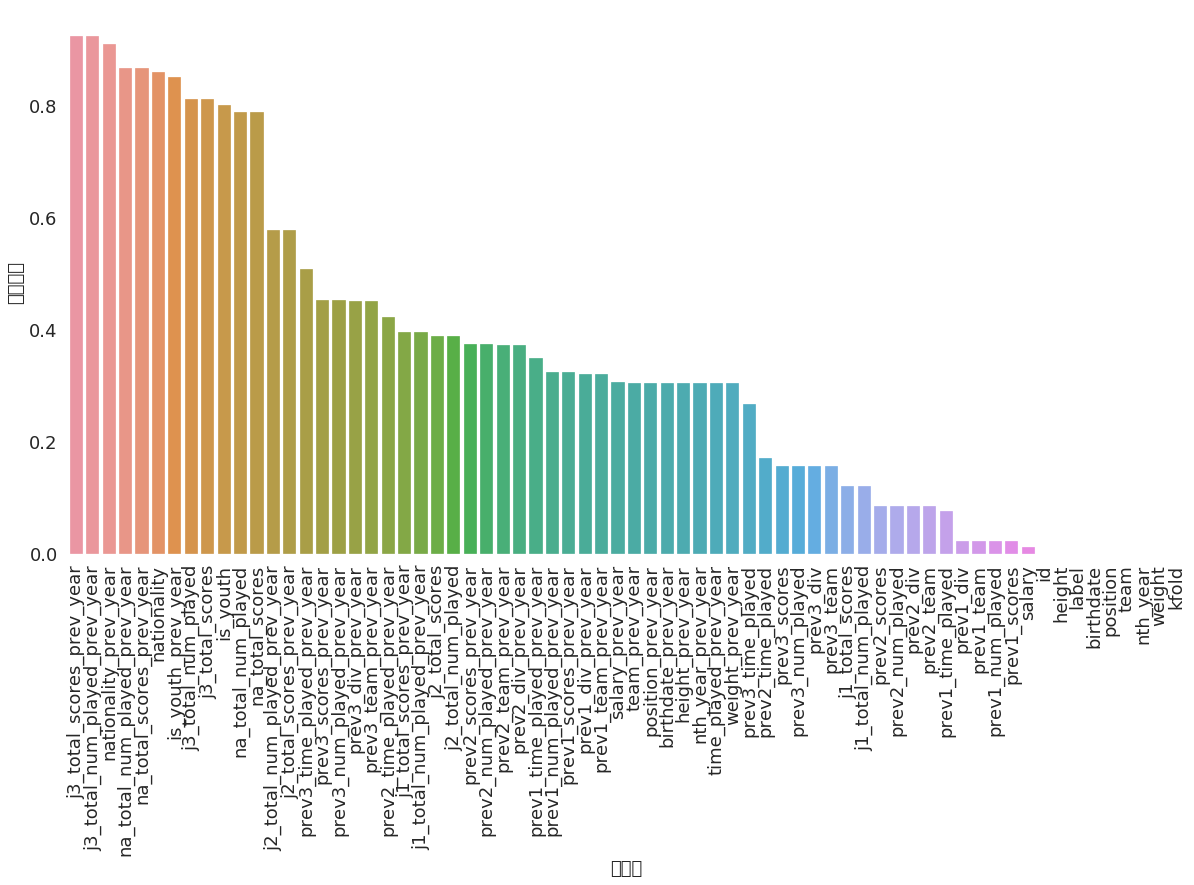

In [26]:
# 欠損値の確認
missing_dict = df.isnull().sum()
missing_rate = missing_dict.values / df.shape[0]
df_missing = pd.DataFrame({'カラム': missing_dict.index, '欠損数': missing_dict.values, '欠損割合': missing_rate}).sort_values(by='欠損割合', ascending=False)
df_missing = df_missing.set_index('カラム')

# 欠損割合可視化
plt.figure(figsize=(20, 10))
sns.barplot(df_missing.index, df_missing['欠損割合'])
plt.xlabel("カラム", fontsize=18)
plt.ylabel("欠損割合", fontsize=18)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

In [27]:
# 1つ以上欠損あるものだけ表示
display(df_missing[df_missing['欠損数']>0])

,欠損数,欠損割合
カラム,,
j3_total_scores_prev_year,437,0.923890
j3_total_num_played_prev_year,437,0.923890
nationality_prev_year,430,0.909091
na_total_num_played_prev_year,410,0.866808
na_total_scores_prev_year,410,0.866808
nationality,407,0.860465
is_youth_prev_year,402,0.849894
j3_total_num_played,384,0.811839
j3_total_scores,384,0.811839


In [28]:
# カラムごとのuniqueな数
display('ユニーク数: ', df.nunique().sort_values(ascending=False))

'ユニーク数: '

id                               473
birthdate                        460
label                            360
prev1_time_played                357
birthdate_prev_year              321
prev2_time_played                311
prev3_time_played                283
time_played_prev_year            260
prev1_time_played_prev_year      252
prev2_time_played_prev_year      221
j1_total_num_played              203
prev3_time_played_prev_year      201
j1_total_num_played_prev_year    163
j2_total_num_played              130
j2_total_num_played_prev_year    111
prev3_team                        88
salary                            83
prev2_team                        78
prev1_team                        73
prev2_team_prev_year              64
salary_prev_year                  64
prev3_team_prev_year              63
j1_total_scores                   59
prev1_team_prev_year              52
prev1_num_played                  45
j1_total_scores_prev_year         45
prev2_num_played                  45
p

------------------------------------------------------------
id
# of unique:  473
statistics:  count    473.000000
mean     387.418605
std      201.970175
min        2.000000
25%      218.000000
50%      389.000000
75%      560.000000
max      722.000000
Name: id, dtype: float64


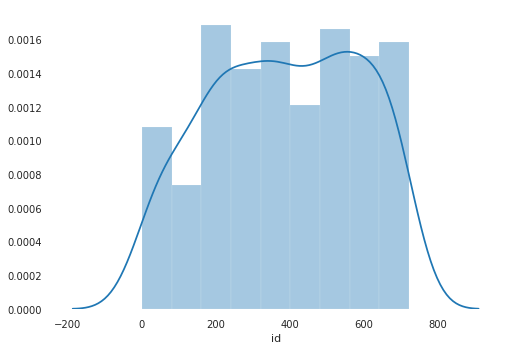

------------------------------------------------------------


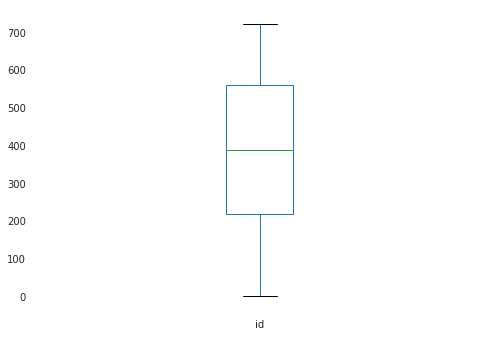

------------------------------------------------------------
height
# of unique:  36
statistics:  count    473.000000
mean     178.410148
std        6.567194
min      155.000000
25%      173.000000
50%      178.000000
75%      183.000000
max      197.000000
Name: height, dtype: float64


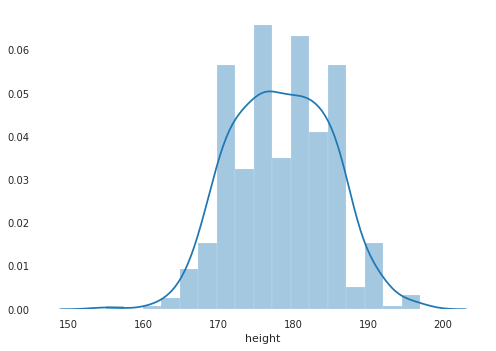

------------------------------------------------------------


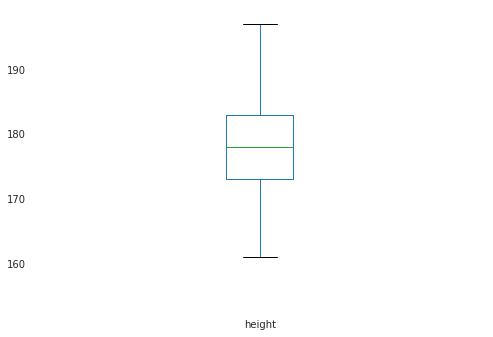

------------------------------------------------------------
weight
# of unique:  37
statistics:  count    473.000000
mean      73.040169
std        6.413412
min       57.000000
25%       68.000000
50%       73.000000
75%       77.000000
max       93.000000
Name: weight, dtype: float64


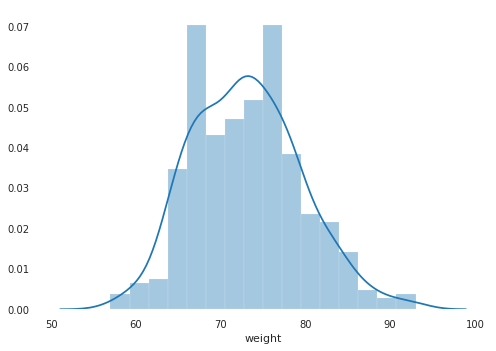

------------------------------------------------------------


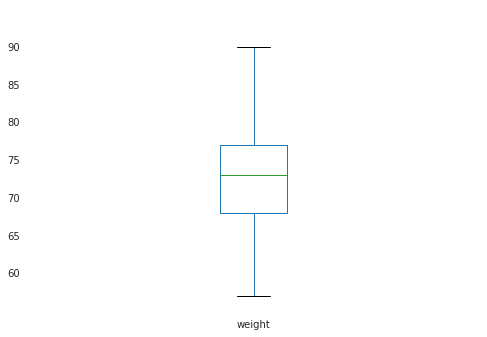

------------------------------------------------------------
nth_year
# of unique:  19
statistics:  count    473.000000
mean       4.186047
std        3.698267
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       20.000000
Name: nth_year, dtype: float64


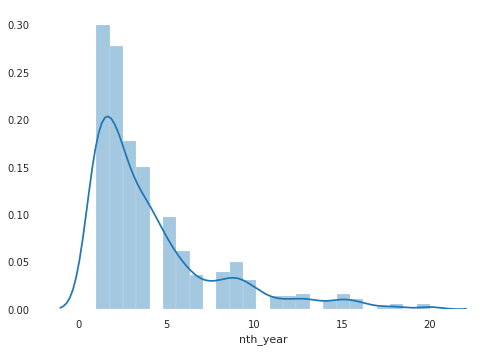

------------------------------------------------------------


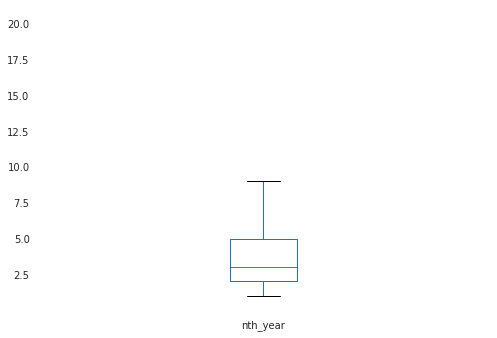

------------------------------------------------------------
is_youth
# of unique:  1
statistics:  count    94.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: is_youth, dtype: float64


/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


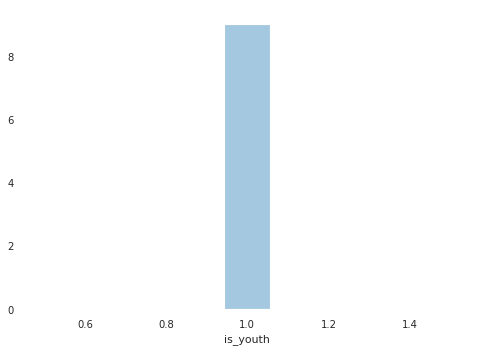

------------------------------------------------------------


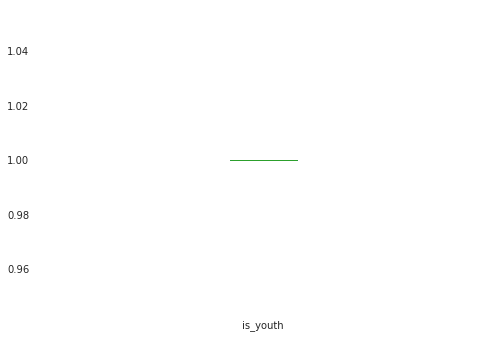

------------------------------------------------------------
j1_total_num_played
# of unique:  203
statistics:  count    416.000000
mean     103.896635
std      107.905878
min        0.000000
25%       18.750000
50%       64.500000
75%      159.750000
max      537.000000
Name: j1_total_num_played, dtype: float64


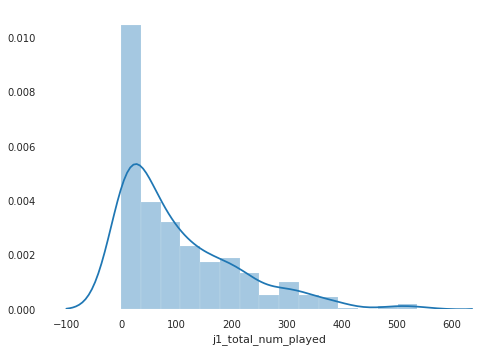

------------------------------------------------------------


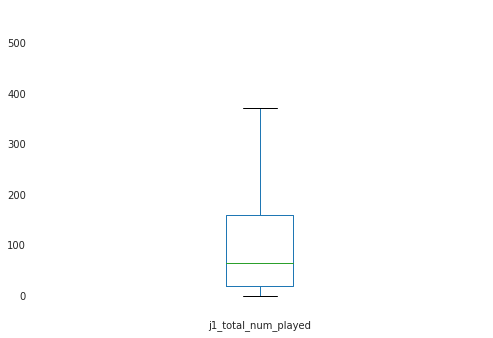

------------------------------------------------------------
j1_total_scores
# of unique:  59
statistics:  count    416.000000
mean      10.656250
std       19.442088
min        0.000000
25%        0.000000
50%        4.000000
75%       12.000000
max      171.000000
Name: j1_total_scores, dtype: float64


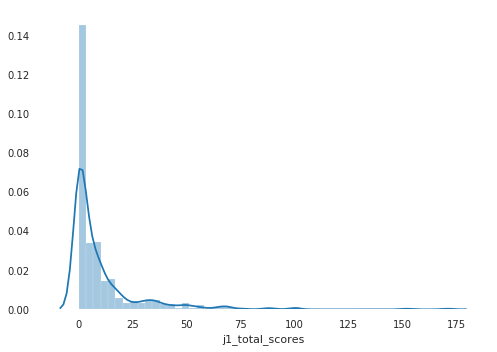

------------------------------------------------------------


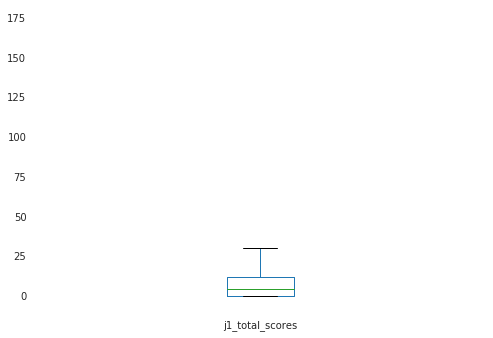

------------------------------------------------------------
j2_total_num_played
# of unique:  130
statistics:  count    289.000000
mean      62.944637
std       57.406116
min        0.000000
25%       27.000000
50%       42.000000
75%       85.000000
max      330.000000
Name: j2_total_num_played, dtype: float64


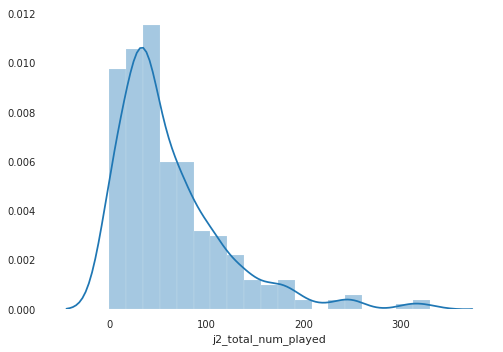

------------------------------------------------------------


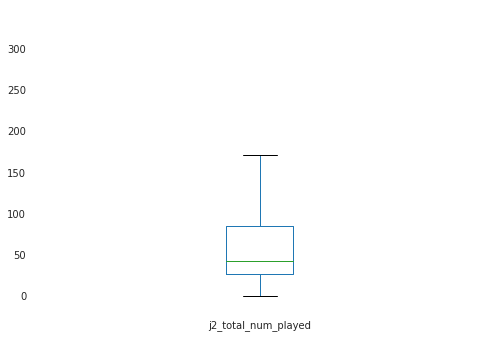

------------------------------------------------------------
j2_total_scores
# of unique:  37
statistics:  count    289.000000
mean       7.044983
std       10.743605
min        0.000000
25%        0.000000
50%        3.000000
75%        9.000000
max       85.000000
Name: j2_total_scores, dtype: float64


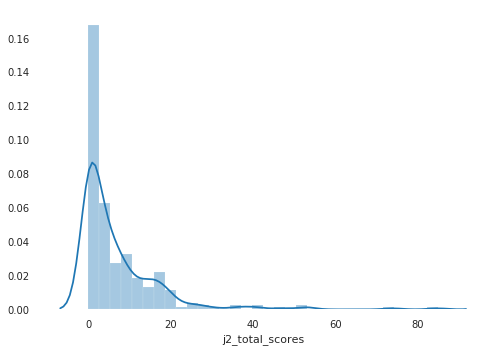

------------------------------------------------------------


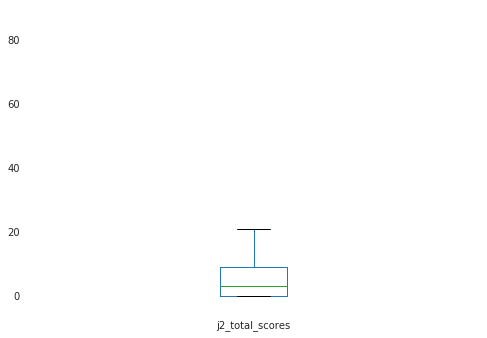

------------------------------------------------------------
j3_total_num_played
# of unique:  28
statistics:  count    89.000000
mean      9.764045
std      11.449516
min       0.000000
25%       2.000000
50%       6.000000
75%      14.000000
max      78.000000
Name: j3_total_num_played, dtype: float64


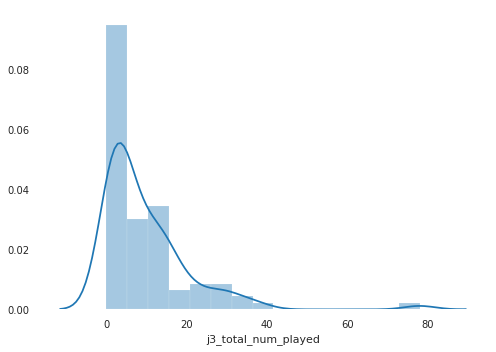

------------------------------------------------------------


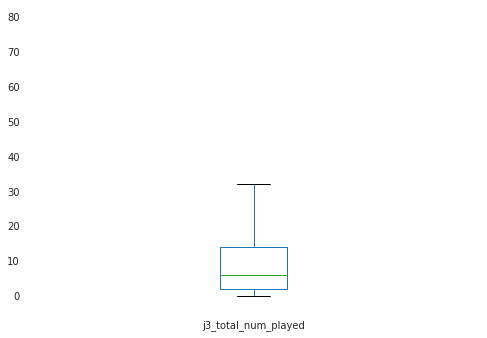

------------------------------------------------------------
j3_total_scores
# of unique:  9
statistics:  count    89.000000
mean      1.056180
std       2.857842
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      19.000000
Name: j3_total_scores, dtype: float64


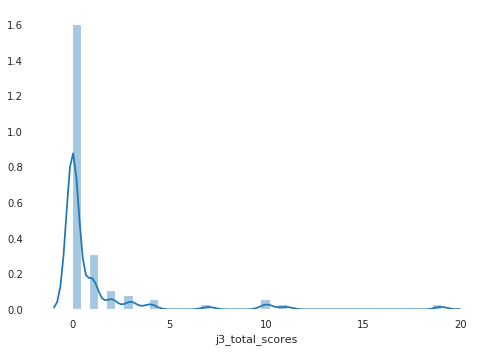

------------------------------------------------------------


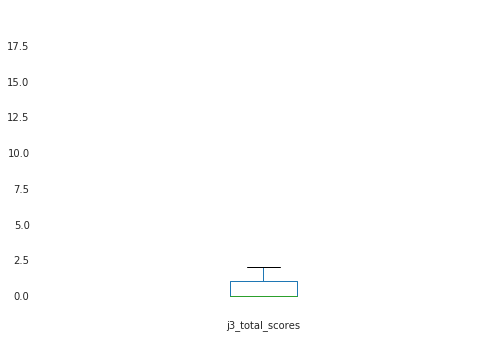

------------------------------------------------------------
na_total_num_played
# of unique:  40
statistics:  count    100.000000
mean      16.920000
std       26.557991
min        0.000000
25%        2.000000
50%        6.000000
75%       20.000000
max      152.000000
Name: na_total_num_played, dtype: float64


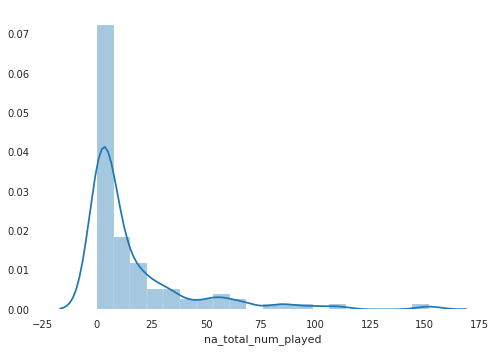

------------------------------------------------------------


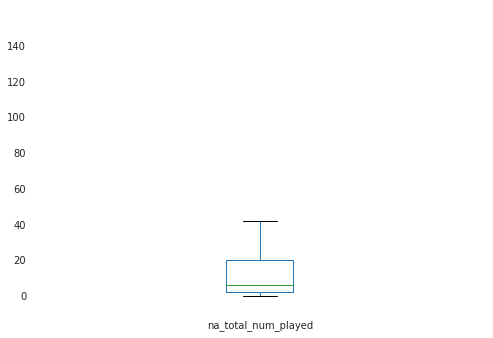

------------------------------------------------------------
na_total_scores
# of unique:  11
statistics:  count    100.000000
mean       1.880000
std        3.890626
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       24.000000
Name: na_total_scores, dtype: float64


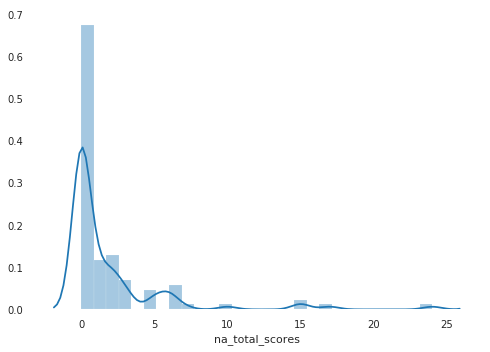

------------------------------------------------------------


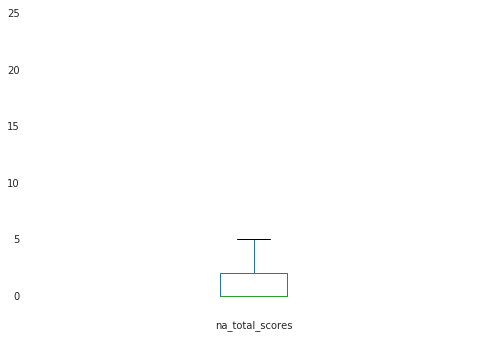

------------------------------------------------------------
team
# of unique:  18
statistics:  count     473
unique     18
top        札幌
freq       29
Name: team, dtype: object
value_counts: 


札幌      0.061311
新潟      0.061311
仙台      0.061311
清水      0.059197
鹿島      0.059197
大宮      0.059197
磐田      0.059197
FC東京    0.057082
浦和      0.057082
神戸      0.057082
甲府      0.057082
柏       0.054968
横浜FM    0.054968
川崎F     0.054968
広島      0.050740
鳥栖      0.048626
G大阪     0.046512
C大阪     0.040169
Name: team, dtype: float64

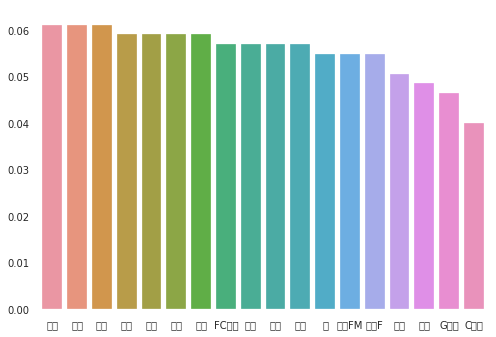

------------------------------------------------------------
position
# of unique:  4
statistics:  count     473
unique      4
top        MF
freq      185
Name: position, dtype: object
value_counts: 


MF    0.391121
DF    0.306554
FW    0.190275
GK    0.112051
Name: position, dtype: float64

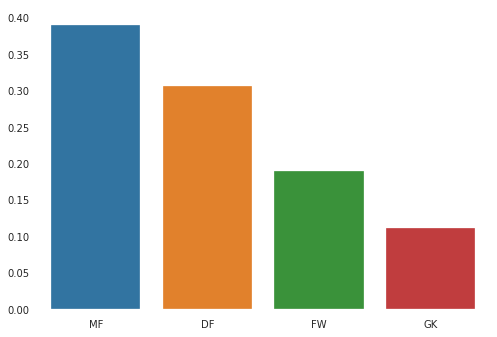

------------------------------------------------------------
birthdate
# of unique:  460
statistics:  count                     473
unique                    460
top       1990-05-28 00:00:00
freq                        2
Name: birthdate, dtype: object
value_counts: 


1990-05-28 00:00:00    0.004228
1986-06-24 00:00:00    0.004228
1990-08-10 00:00:00    0.004228
1994-08-23 00:00:00    0.004228
1993-05-12 00:00:00    0.004228
                         ...   
1991-12-25 00:00:00    0.002114
1991-10-05 00:00:00    0.002114
1988-09-21 00:00:00    0.002114
1986-07-31 00:00:00    0.002114
1990-06-22 00:00:00    0.002114
Name: birthdate, Length: 460, dtype: float64

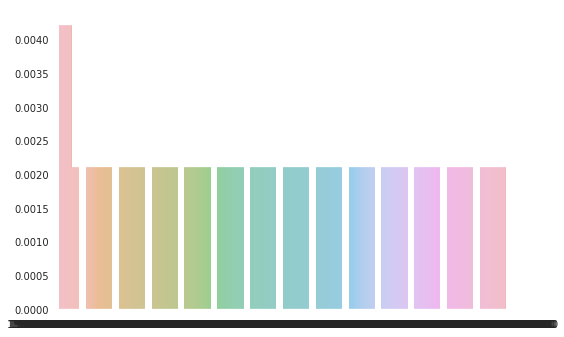

------------------------------------------------------------
salary
# of unique:  83
statistics:  count     467
unique     83
top       480
freq       30
Name: salary, dtype: object
value_counts: 


480      0.063425
1500     0.048626
1200     0.044397
2500     0.040169
3500     0.035941
2000     0.031712
400      0.029598
1000     0.029598
4000     0.029598
450      0.027484
2800     0.027484
800      0.023256
650      0.021142
1100     0.021142
1800     0.019027
1300     0.019027
700      0.019027
600      0.019027
380      0.019027
900      0.016913
1600     0.016913
3000     0.016913
500      0.014799
2300     0.014799
2700     0.014799
2200     0.012685
2100     0.012685
7000     0.012685
4500     0.012685
3100     0.012685
NaN      0.012685
3300     0.012685
2900     0.010571
5000     0.010571
3200     0.010571
8000     0.010571
750      0.008457
6000     0.008457
5500     0.008457
10000    0.008457
1700     0.008457
1900     0.006342
4300     0.006342
4800     0.006342
6500     0.006342
550      0.006342
2600     0.006342
3600     0.006342
420      0.006342
1400     0.006342
3800     0.006342
9000     0.006342
710      0.004228
8300     0.004228
3900     0.004228
7500     0

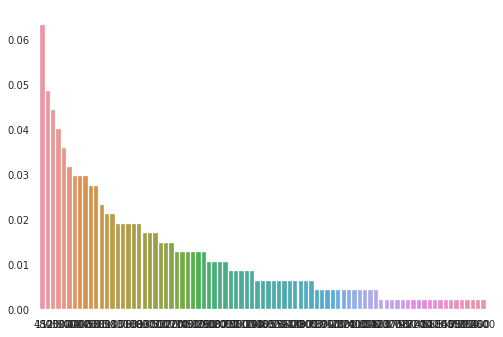

------------------------------------------------------------
nationality
# of unique:  14
statistics:  count         66
unique        14
top       brazil
freq          37
Name: nationality, dtype: object
value_counts: 


NaN                    0.860465
brazil                 0.078224
korea                  0.027484
australia              0.006342
croatia                0.004228
slovenia               0.004228
curacao・netherlands    0.002114
argentine              0.002114
poland                 0.002114
spain・macedonia        0.002114
uzbekistan             0.002114
serbia                 0.002114
peru                   0.002114
koera                  0.002114
portugal               0.002114
Name: nationality, dtype: float64

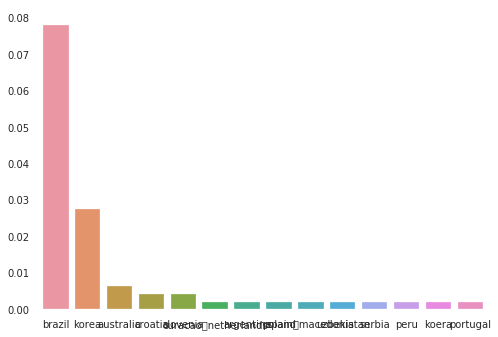

------------------------------------------------------------
prev3_team
# of unique:  88
statistics:  count     399
unique     88
top         柏
freq       19
Name: prev3_team, dtype: object
value_counts: 


NaN            0.156448
柏              0.040169
鹿島             0.038055
横浜FM           0.035941
川崎F            0.035941
広島             0.035941
仙台             0.033827
浦和             0.033827
FC東京           0.031712
清水             0.031712
新潟             0.031712
甲府             0.031712
大宮             0.029598
G大阪            0.029598
鳥栖             0.027484
磐田             0.027484
札幌             0.027484
BRA            0.027484
神戸             0.023256
C大阪            0.019027
千葉             0.019027
湘南             0.016913
BRA・BRA        0.010571
KOR            0.008457
GER            0.008457
京都             0.008457
東京V            0.006342
福岡             0.006342
長崎             0.006342
名古屋            0.006342
岡山             0.006342
BRA・BRA・BRA    0.004228
AUS            0.004228
山形             0.004228
秋田             0.004228
愛媛             0.004228
SPA            0.004228
THA            0.004228
北九州            0.004228
大分             0.004228
松本             0.004228
熊本             0

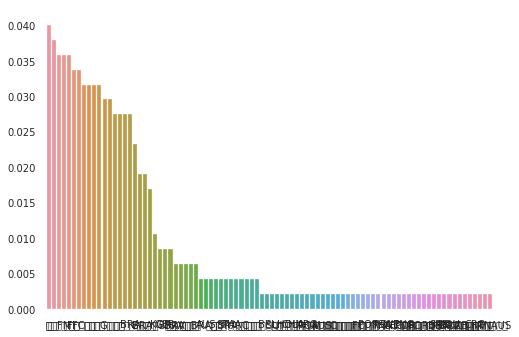

------------------------------------------------------------
prev2_team
# of unique:  78
statistics:  count     433
unique     78
top        仙台
freq       22
Name: prev2_team, dtype: object
value_counts: 


NaN            0.084567
柏              0.046512
仙台             0.046512
FC東京           0.044397
川崎F            0.042283
浦和             0.042283
大宮             0.040169
鹿島             0.040169
横浜FM           0.040169
神戸             0.040169
新潟             0.038055
札幌             0.038055
磐田             0.035941
清水             0.035941
広島             0.035941
G大阪            0.033827
甲府             0.029598
鳥栖             0.029598
千葉             0.021142
C大阪            0.016913
BRA            0.016913
BRA・BRA        0.012685
湘南             0.012685
KOR            0.010571
京都             0.010571
名古屋            0.008457
福岡             0.008457
長崎             0.006342
GER            0.006342
水戸             0.004228
岡山             0.004228
松本             0.004228
山形             0.004228
栃木             0.004228
大分             0.004228
新潟・水戸          0.004228
北九州            0.004228
山口             0.004228
仙台・熊本          0.002114
BEL            0.002114
仙台・金沢          0.002114
横浜FC           0

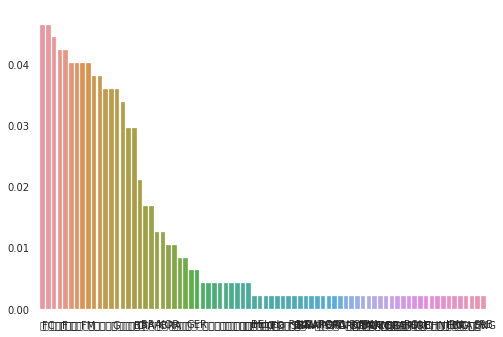

------------------------------------------------------------
prev1_team
# of unique:  73
statistics:  count     462
unique     73
top        仙台
freq       28
Name: prev1_team, dtype: object
value_counts: 


仙台             0.059197
大宮             0.057082
川崎F            0.052854
柏              0.050740
札幌             0.048626
FC東京           0.048626
横浜FM           0.046512
磐田             0.046512
浦和             0.046512
清水             0.046512
G大阪            0.044397
神戸             0.042283
鹿島             0.042283
広島             0.038055
鳥栖             0.035941
甲府             0.035941
新潟             0.035941
C大阪            0.031712
NaN            0.023256
BRA・BRA        0.012685
湘南             0.008457
千葉             0.008457
名古屋            0.008457
水戸             0.006342
KOR            0.006342
大分             0.004228
岡山             0.004228
福岡             0.004228
山口             0.004228
SRB            0.004228
BRA            0.004228
BRA・甲府         0.002114
群馬             0.002114
POR            0.002114
新潟・岡山          0.002114
広島・清水          0.002114
徳島・清水          0.002114
松本             0.002114
ARG・ARG        0.002114
鹿島・鳥栖          0.002114
横浜FM・町田        0.002114
BRA・柏          0

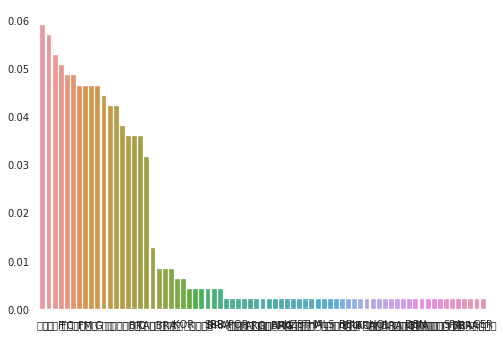

------------------------------------------------------------
prev3_div
# of unique:  5
statistics:  count     399
unique      5
top         1
freq      256
Name: prev3_div, dtype: object
value_counts: 


1      0.541226
2      0.186047
NaN    0.156448
9      0.099366
3      0.010571
4      0.006342
Name: prev3_div, dtype: float64

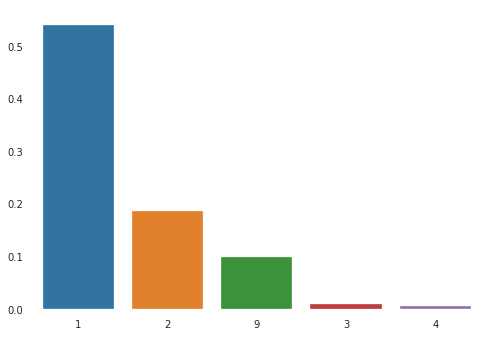

------------------------------------------------------------
prev2_div
# of unique:  5
statistics:  count     433
unique      5
top         1
freq      281
Name: prev2_div, dtype: object
value_counts: 


1      0.594080
2      0.228330
NaN    0.084567
9      0.080338
3      0.008457
4      0.004228
Name: prev2_div, dtype: float64

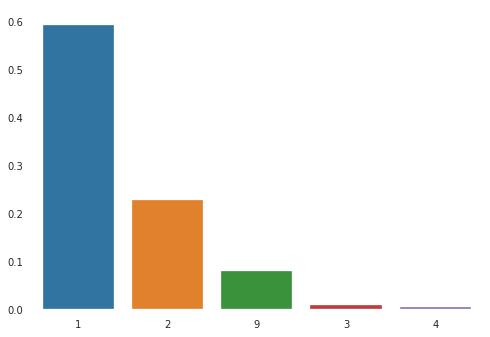

------------------------------------------------------------
prev1_div
# of unique:  4
statistics:  count     462
unique      4
top         1
freq      343
Name: prev1_div, dtype: object
value_counts: 


1      0.725159
2      0.183932
9      0.050740
NaN    0.023256
3      0.016913
Name: prev1_div, dtype: float64

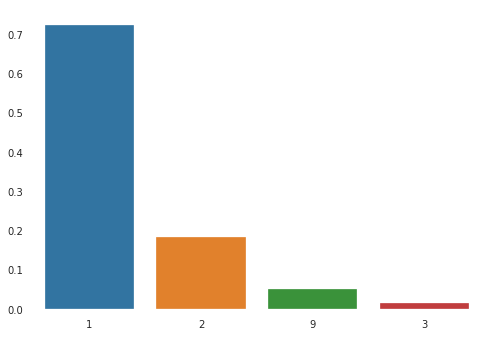

------------------------------------------------------------
prev3_num_played
# of unique:  44
statistics:  count     399
unique     44
top         0
freq       46
Name: prev3_num_played, dtype: object
value_counts: 


NaN    0.156448
0      0.097252
32     0.054968
34     0.050740
30     0.040169
33     0.038055
31     0.033827
24     0.025370
28     0.023256
29     0.023256
7      0.023256
23     0.023256
18     0.023256
21     0.023256
25     0.021142
14     0.021142
15     0.019027
2      0.019027
19     0.019027
20     0.016913
27     0.016913
35     0.014799
41     0.014799
26     0.014799
16     0.014799
10     0.012685
4      0.012685
1      0.012685
12     0.012685
11     0.012685
13     0.010571
42     0.010571
37     0.010571
39     0.010571
5      0.010571
8      0.008457
22     0.008457
17     0.006342
3      0.006342
6      0.006342
36     0.004228
38     0.004228
9      0.004228
40     0.004228
54     0.002114
Name: prev3_num_played, dtype: float64

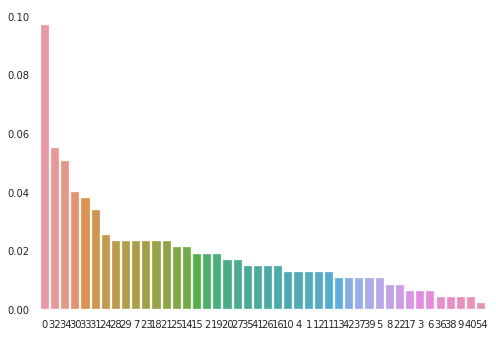

------------------------------------------------------------
prev2_num_played
# of unique:  45
statistics:  count     433
unique     45
top         0
freq       47
Name: prev2_num_played, dtype: object
value_counts: 


0      0.099366
NaN    0.084567
33     0.052854
31     0.046512
32     0.046512
29     0.040169
34     0.040169
30     0.035941
19     0.031712
13     0.029598
28     0.027484
26     0.021142
8      0.021142
22     0.019027
5      0.019027
39     0.019027
25     0.019027
36     0.016913
14     0.016913
18     0.016913
27     0.016913
11     0.016913
21     0.016913
2      0.016913
20     0.016913
1      0.016913
12     0.014799
24     0.014799
3      0.014799
35     0.014799
10     0.012685
42     0.012685
17     0.012685
7      0.012685
9      0.010571
41     0.010571
37     0.010571
23     0.010571
15     0.010571
4      0.008457
16     0.008457
6      0.006342
40     0.002114
52     0.002114
46     0.002114
38     0.002114
Name: prev2_num_played, dtype: float64

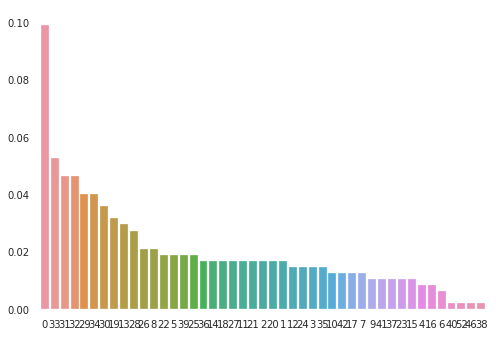

------------------------------------------------------------
prev1_num_played
# of unique:  45
statistics:  count     462
unique     45
top         0
freq       43
Name: prev1_num_played, dtype: object
value_counts: 


0      0.090909
34     0.052854
33     0.046512
30     0.035941
18     0.033827
29     0.033827
15     0.033827
32     0.031712
28     0.031712
31     0.031712
26     0.029598
21     0.027484
23     0.025370
19     0.025370
20     0.023256
14     0.023256
17     0.023256
NaN    0.023256
27     0.023256
13     0.023256
2      0.023256
25     0.021142
7      0.021142
5      0.021142
24     0.021142
1      0.019027
6      0.016913
12     0.016913
22     0.016913
8      0.014799
10     0.014799
42     0.012685
4      0.012685
16     0.012685
9      0.012685
37     0.010571
11     0.010571
39     0.008457
35     0.008457
3      0.008457
41     0.008457
40     0.006342
36     0.004228
43     0.002114
49     0.002114
44     0.002114
Name: prev1_num_played, dtype: float64

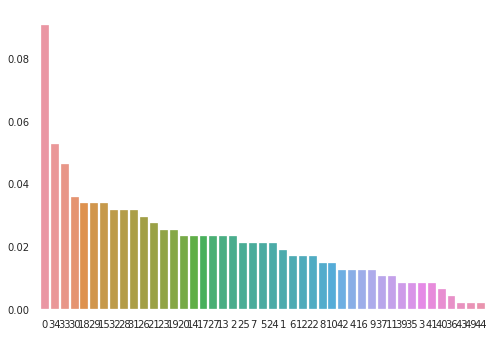

------------------------------------------------------------
prev3_scores
# of unique:  18
statistics:  count     399
unique     18
top         0
freq      169
Name: prev3_scores, dtype: object
value_counts: 


0      0.357294
NaN    0.156448
1      0.154334
3      0.090909
2      0.069767
4      0.035941
6      0.029598
5      0.027484
7      0.021142
8      0.012685
9      0.010571
12     0.006342
10     0.006342
13     0.006342
15     0.004228
14     0.004228
11     0.002114
18     0.002114
17     0.002114
Name: prev3_scores, dtype: float64

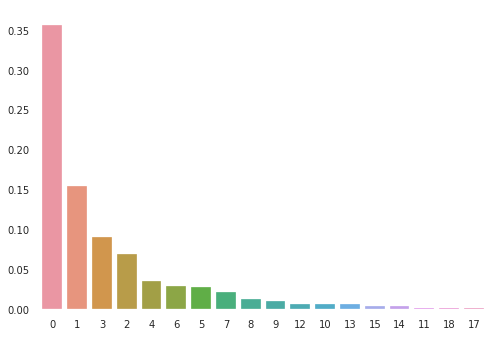

------------------------------------------------------------
prev2_scores
# of unique:  20
statistics:  count     433
unique     20
top         0
freq      189
Name: prev2_scores, dtype: object
value_counts: 


0      0.399577
1      0.154334
2      0.090909
NaN    0.084567
3      0.065539
4      0.059197
5      0.027484
6      0.025370
7      0.025370
8      0.019027
13     0.008457
10     0.006342
9      0.006342
11     0.006342
12     0.004228
19     0.004228
14     0.004228
20     0.002114
17     0.002114
23     0.002114
16     0.002114
Name: prev2_scores, dtype: float64

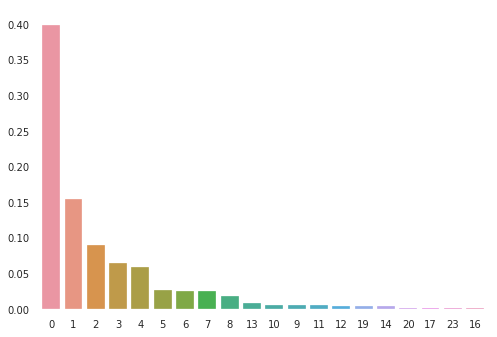

------------------------------------------------------------
prev1_scores
# of unique:  20
statistics:  count     462
unique     20
top         0
freq      219
Name: prev1_scores, dtype: object
value_counts: 


0      0.463002
1      0.183932
2      0.082452
3      0.061311
4      0.042283
5      0.040169
NaN    0.023256
7      0.016913
6      0.014799
8      0.012685
12     0.008457
9      0.008457
11     0.008457
10     0.008457
14     0.006342
15     0.004228
19     0.004228
13     0.004228
26     0.002114
16     0.002114
18     0.002114
Name: prev1_scores, dtype: float64

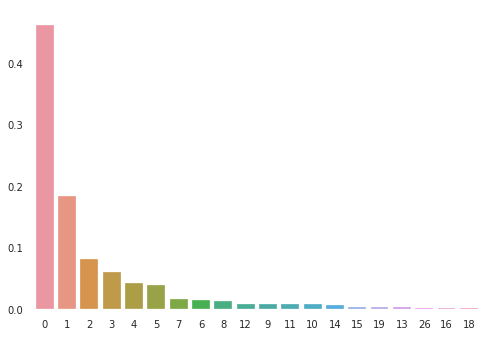

------------------------------------------------------------
prev3_time_played
# of unique:  283
statistics:  count     347
unique    283
top         0
freq       40
Name: prev3_time_played, dtype: object
value_counts: 


NaN     0.266385
0       0.084567
3060    0.021142
450     0.008457
3780    0.006342
          ...   
36      0.002114
2037    0.002114
1647    0.002114
2521    0.002114
931     0.002114
Name: prev3_time_played, Length: 284, dtype: float64

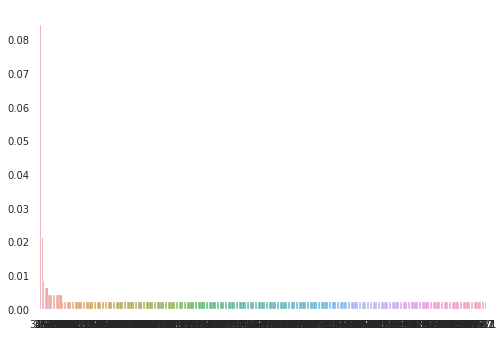

------------------------------------------------------------
prev2_time_played
# of unique:  311
statistics:  count     392
unique    311
top         0
freq       44
Name: prev2_time_played, dtype: object
value_counts: 


NaN     0.171247
0       0.093023
3060    0.019027
2970    0.008457
2070    0.006342
          ...   
1430    0.002114
621     0.002114
2363    0.002114
2661    0.002114
2093    0.002114
Name: prev2_time_played, Length: 312, dtype: float64

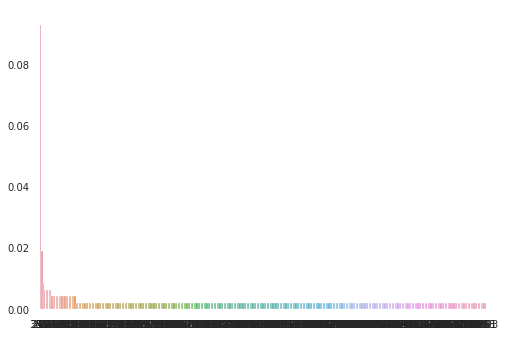

------------------------------------------------------------
prev1_time_played
# of unique:  357
statistics:  count     437
unique    357
top         0
freq       40
Name: prev1_time_played, dtype: object
value_counts: 


0       0.084567
NaN     0.076110
3060    0.019027
2970    0.012685
90      0.008457
          ...   
1957    0.002114
1552    0.002114
606     0.002114
2841    0.002114
2700    0.002114
Name: prev1_time_played, Length: 358, dtype: float64

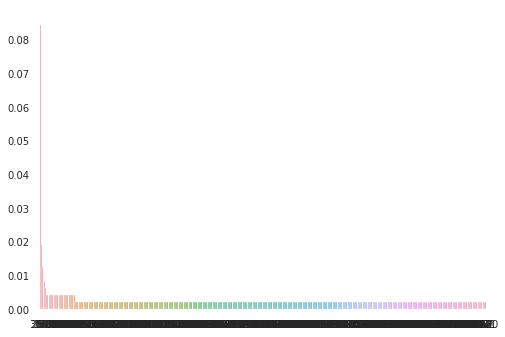

------------------------------------------------------------
label
# of unique:  360
statistics:  count     473.000000
mean     1181.228330
std      1019.820915
min         0.000000
25%       180.000000
50%       973.000000
75%      2110.000000
max      3060.000000
Name: label, dtype: float64


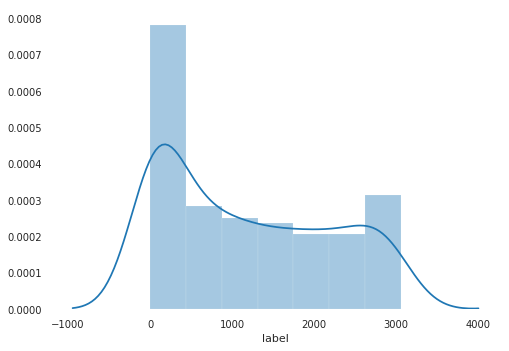

------------------------------------------------------------


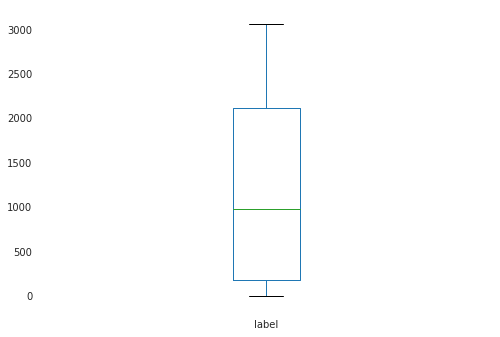

------------------------------------------------------------
height_prev_year
# of unique:  34
statistics:  count    329.000000
mean     178.203647
std        6.479178
min      155.000000
25%      173.000000
50%      178.000000
75%      183.000000
max      196.000000
Name: height_prev_year, dtype: float64


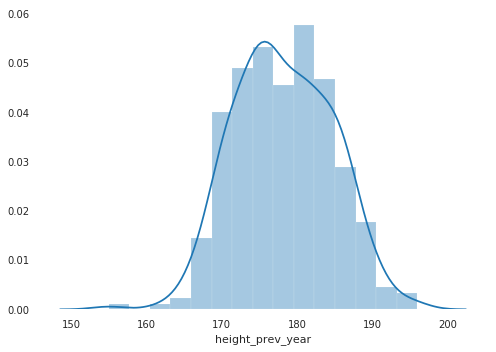

------------------------------------------------------------


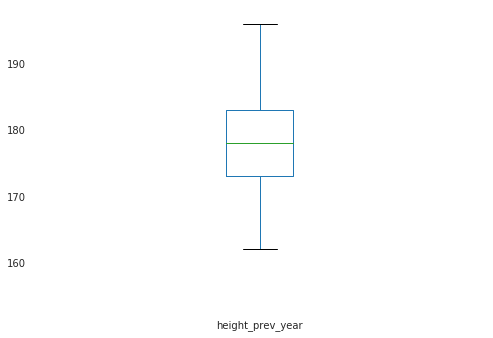

------------------------------------------------------------
weight_prev_year
# of unique:  33
statistics:  count    329.000000
mean      73.000000
std        6.473209
min       59.000000
25%       68.000000
50%       73.000000
75%       77.000000
max       97.000000
Name: weight_prev_year, dtype: float64


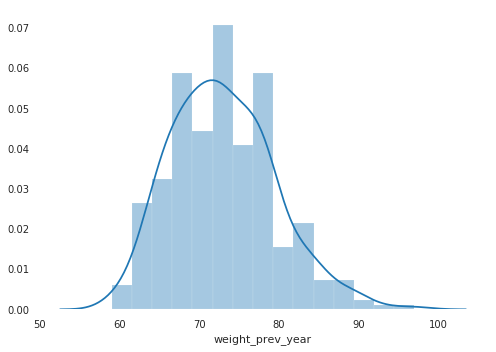

------------------------------------------------------------


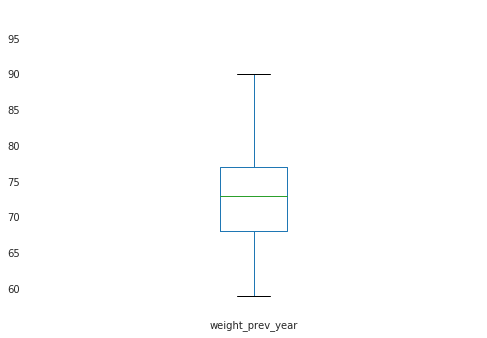

------------------------------------------------------------
nth_year_prev_year
# of unique:  18
statistics:  count    329.000000
mean       4.000000
std        3.491278
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       19.000000
Name: nth_year_prev_year, dtype: float64


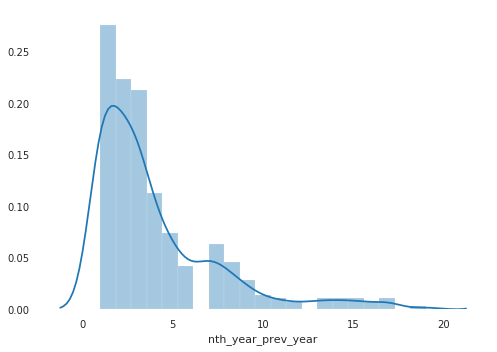

------------------------------------------------------------


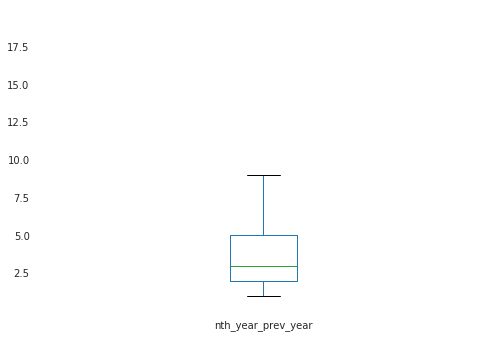

------------------------------------------------------------
is_youth_prev_year
# of unique:  1
statistics:  count    71.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: is_youth_prev_year, dtype: float64


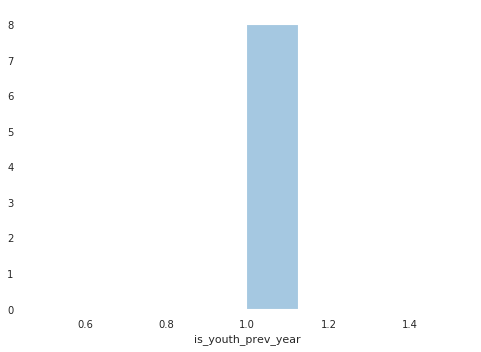

------------------------------------------------------------


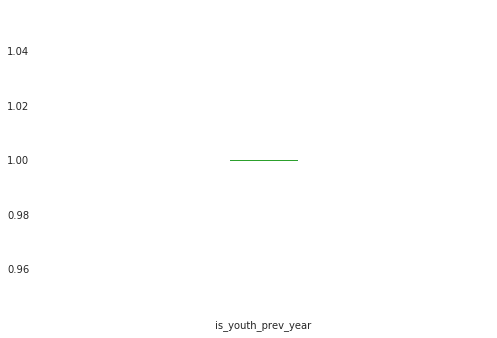

------------------------------------------------------------
j1_total_num_played_prev_year
# of unique:  163
statistics:  count    286.000000
mean      92.311189
std      102.620871
min        0.000000
25%       18.000000
50%       55.000000
75%      135.750000
max      503.000000
Name: j1_total_num_played_prev_year, dtype: float64


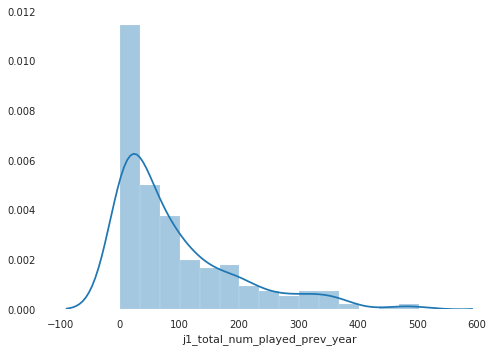

------------------------------------------------------------


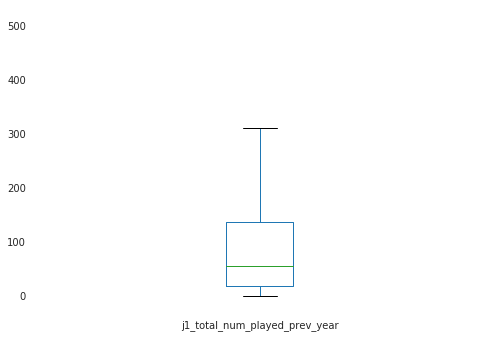

------------------------------------------------------------
j1_total_scores_prev_year
# of unique:  45
statistics:  count    286.000000
mean       8.629371
std       17.467636
min        0.000000
25%        0.000000
50%        2.000000
75%        9.000000
max      156.000000
Name: j1_total_scores_prev_year, dtype: float64


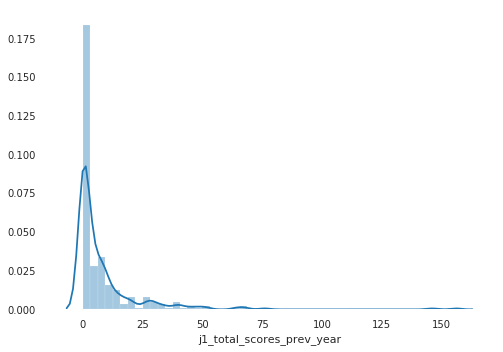

------------------------------------------------------------


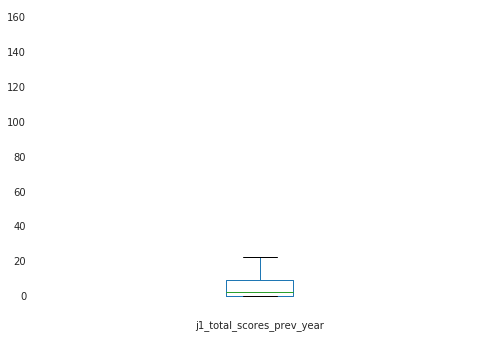

------------------------------------------------------------
j2_total_num_played_prev_year
# of unique:  111
statistics:  count    200.000000
mean      63.975000
std       59.365357
min        0.000000
25%       23.000000
50%       46.500000
75%       88.000000
max      330.000000
Name: j2_total_num_played_prev_year, dtype: float64


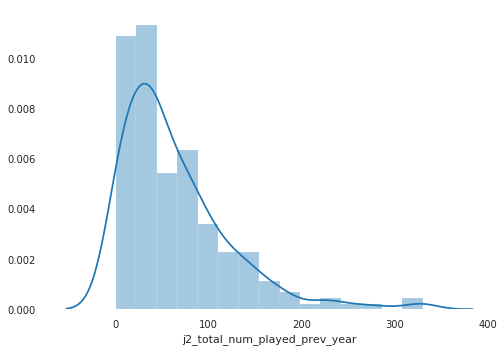

------------------------------------------------------------


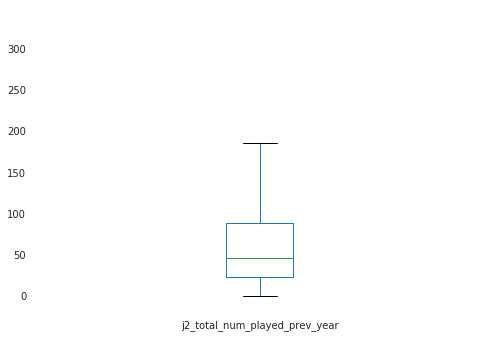

------------------------------------------------------------
j2_total_scores_prev_year
# of unique:  30
statistics:  count    200.000000
mean       6.820000
std        9.429325
min        0.000000
25%        0.000000
50%        3.000000
75%        9.000000
max       53.000000
Name: j2_total_scores_prev_year, dtype: float64


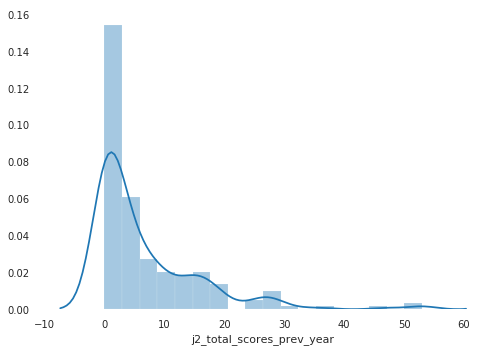

------------------------------------------------------------


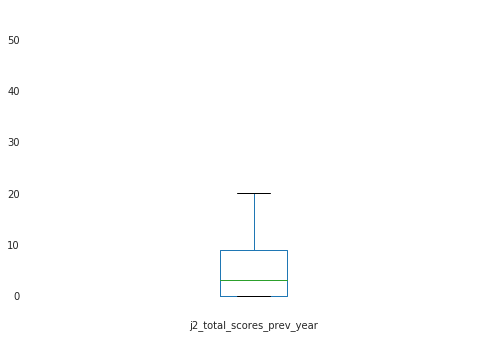

------------------------------------------------------------
j3_total_num_played_prev_year
# of unique:  17
statistics:  count    36.000000
mean      9.833333
std      11.269428
min       1.000000
25%       3.000000
50%       7.000000
75%      12.500000
max      64.000000
Name: j3_total_num_played_prev_year, dtype: float64


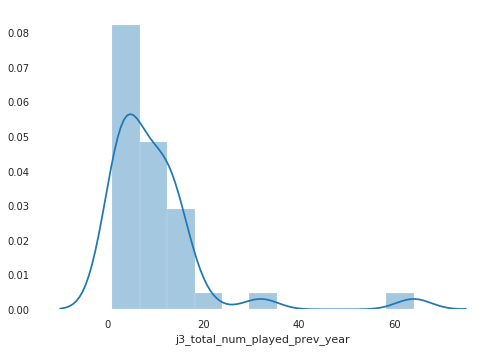

------------------------------------------------------------


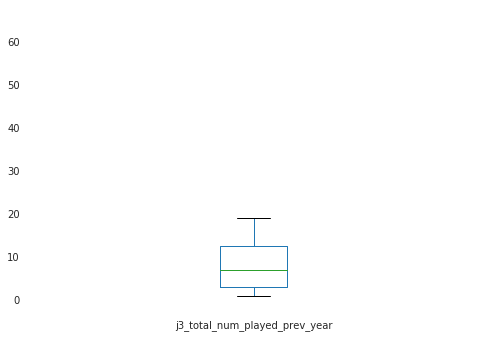

------------------------------------------------------------
j3_total_scores_prev_year
# of unique:  6
statistics:  count    36.000000
mean      0.638889
std       1.222475
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       5.000000
Name: j3_total_scores_prev_year, dtype: float64


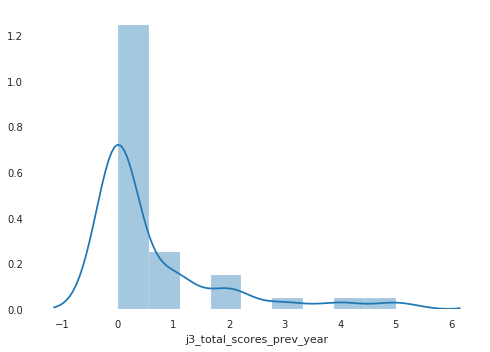

------------------------------------------------------------


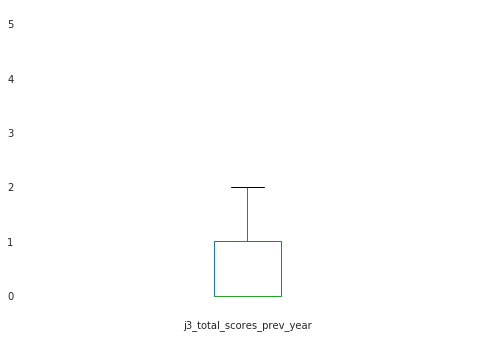

------------------------------------------------------------
na_total_num_played_prev_year
# of unique:  28
statistics:  count     63.000000
mean      13.571429
std       22.834407
min        0.000000
25%        1.000000
50%        4.000000
75%       14.500000
max      110.000000
Name: na_total_num_played_prev_year, dtype: float64


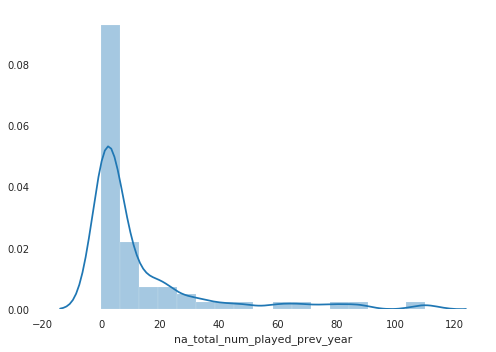

------------------------------------------------------------


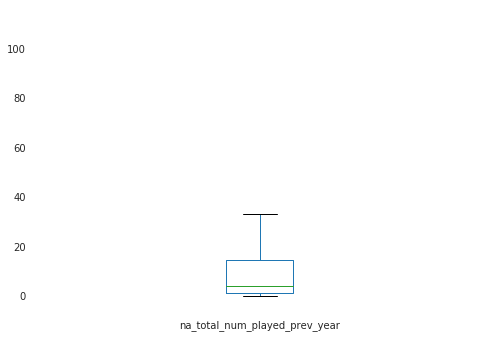

------------------------------------------------------------
na_total_scores_prev_year
# of unique:  8
statistics:  count    63.000000
mean      1.238095
std       2.803881
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      17.000000
Name: na_total_scores_prev_year, dtype: float64


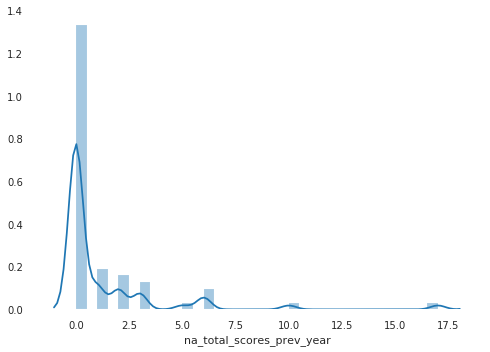

------------------------------------------------------------


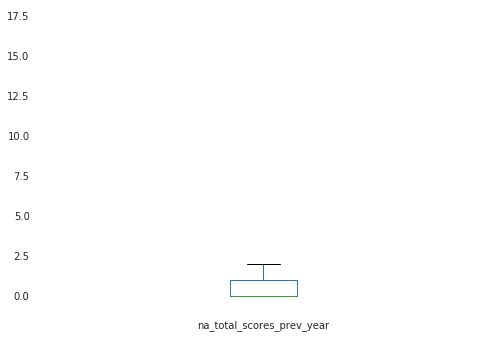

------------------------------------------------------------
team_prev_year
# of unique:  18
statistics:  count     329
unique     18
top        神戸
freq       23
Name: team_prev_year, dtype: object
value_counts: 


NaN     0.304440
神戸      0.048626
甲府      0.046512
広島      0.044397
柏       0.044397
名古屋     0.044397
鹿島      0.042283
磐田      0.042283
湘南      0.042283
鳥栖      0.040169
川崎F     0.040169
新潟      0.040169
福岡      0.038055
大宮      0.035941
仙台      0.035941
浦和      0.029598
横浜FM    0.029598
G大阪     0.027484
FC東京    0.023256
Name: team_prev_year, dtype: float64

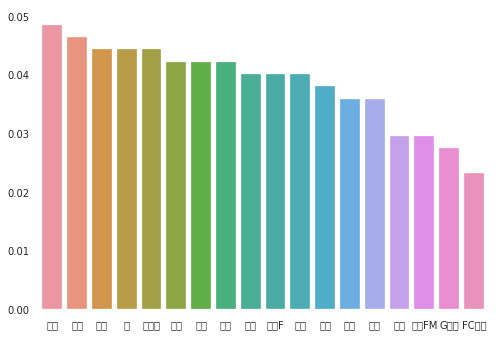

------------------------------------------------------------
position_prev_year
# of unique:  4
statistics:  count     329
unique      4
top        MF
freq      126
Name: position_prev_year, dtype: object
value_counts: 


NaN    0.304440
MF     0.266385
DF     0.221987
FW     0.135307
GK     0.071882
Name: position_prev_year, dtype: float64

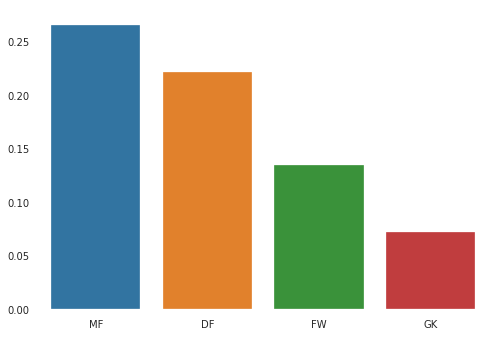

------------------------------------------------------------
birthdate_prev_year
# of unique:  321
statistics:  count            329
unique           321
top       1991-03-16
freq               2
Name: birthdate_prev_year, dtype: object
value_counts: 


NaN           0.304440
1990-08-10    0.004228
1991-03-16    0.004228
1981-05-09    0.004228
1996-04-26    0.004228
                ...   
1992-11-09    0.002114
1996-08-23    0.002114
1990-03-30    0.002114
1980-11-17    0.002114
1983-05-05    0.002114
Name: birthdate_prev_year, Length: 322, dtype: float64

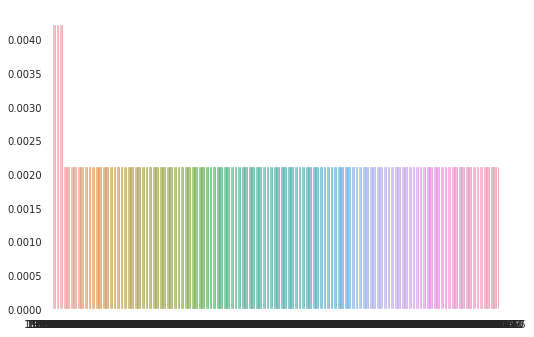

------------------------------------------------------------
salary_prev_year
# of unique:  64
statistics:  count     328
unique     64
top       380
freq       23
Name: salary_prev_year, dtype: object
value_counts: 


NaN      0.306554
380      0.048626
480      0.044397
1500     0.044397
1200     0.038055
2500     0.031712
2000     0.029598
1300     0.027484
800      0.025370
700      0.021142
600      0.021142
1000     0.021142
1800     0.019027
500      0.019027
1400     0.019027
4500     0.014799
4000     0.014799
3000     0.014799
2200     0.012685
900      0.010571
1600     0.010571
8000     0.010571
2800     0.010571
1100     0.008457
2300     0.008457
3500     0.008457
550      0.008457
2400     0.008457
400      0.008457
2100     0.006342
5000     0.006342
750      0.006342
1900     0.006342
7000     0.006342
850      0.006342
650      0.006342
6000     0.004228
3800     0.004228
3300     0.004228
3400     0.004228
4800     0.004228
5800     0.004228
4200     0.004228
10000    0.004228
1700     0.004228
5500     0.004228
2900     0.004228
3100     0.004228
11000    0.004228
3700     0.002114
630      0.002114
3200     0.002114
5900     0.002114
460      0.002114
4100     0.002114
7800     0

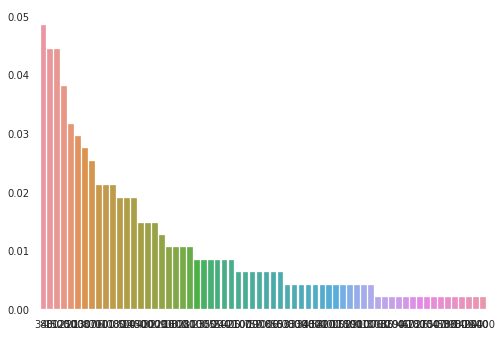

------------------------------------------------------------
nationality_prev_year
# of unique:  12
statistics:  count         43
unique        12
top       brazil
freq          25
Name: nationality_prev_year, dtype: object
value_counts: 


NaN                                          0.909091
brazil                                       0.052854
korea                                        0.012685
brazil・Democratic Republic of Timor-Leste    0.004228
australia                                    0.004228
new zealand                                  0.002114
spain                                        0.002114
croatia                                      0.002114
england                                      0.002114
poland                                       0.002114
slovenia                                     0.002114
northe korea                                 0.002114
sweden                                       0.002114
Name: nationality_prev_year, dtype: float64

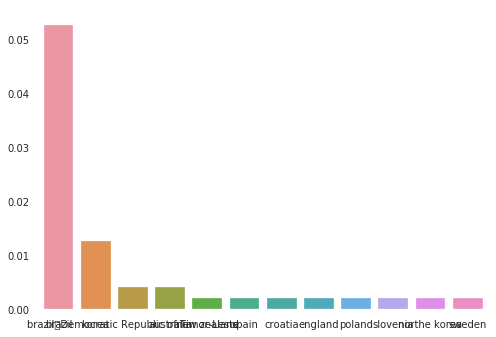

------------------------------------------------------------
prev3_team_prev_year
# of unique:  63
statistics:  count     260
unique     63
top        鳥栖
freq       16
Name: prev3_team_prev_year, dtype: object
value_counts: 


NaN              0.450317
鳥栖               0.033827
甲府               0.029598
広島               0.025370
柏                0.023256
湘南               0.023256
大宮               0.023256
神戸               0.023256
G大阪              0.021142
浦和               0.021142
磐田               0.021142
BRA              0.019027
横浜FM             0.019027
鹿島               0.019027
仙台               0.016913
川崎F              0.014799
福岡               0.014799
FC東京             0.014799
新潟               0.012685
千葉               0.012685
名古屋              0.010571
清水               0.008457
東京V              0.008457
C大阪              0.008457
大分               0.008457
KOR              0.008457
水戸               0.006342
徳島               0.006342
京都               0.006342
栃木               0.006342
POL              0.004228
松本               0.004228
SPA              0.004228
鳥取               0.004228
横浜FC             0.004228
清水・鳥栖            0.002114
YS横浜FM           0.002114
HOL              0.002114
仙台・長崎       

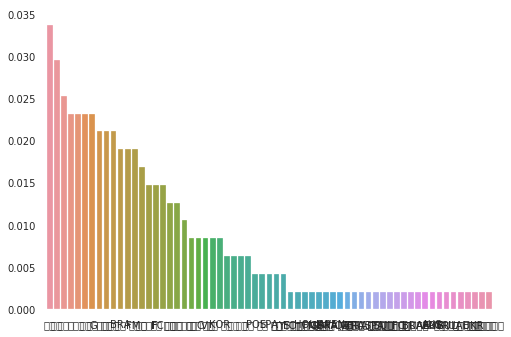

------------------------------------------------------------
prev2_team_prev_year
# of unique:  64
statistics:  count     297
unique     64
top        広島
freq       19
Name: prev2_team_prev_year, dtype: object
value_counts: 


NaN                0.372093
広島                 0.040169
甲府                 0.035941
鳥栖                 0.033827
柏                  0.031712
湘南                 0.029598
鹿島                 0.027484
大宮                 0.027484
名古屋                0.027484
川崎F                0.027484
神戸                 0.025370
G大阪                0.025370
横浜FM               0.023256
浦和                 0.021142
磐田                 0.021142
福岡                 0.019027
仙台                 0.019027
新潟                 0.019027
FC東京               0.014799
BRA                0.014799
清水                 0.010571
千葉                 0.008457
大分                 0.008457
長崎                 0.008457
東京V                0.006342
松本                 0.004228
CHN                0.004228
山形                 0.004228
栃木                 0.004228
BRA・BRA            0.004228
C大阪                0.004228
徳島                 0.004228
KOR                0.004228
新潟・名古屋             0.002114
BRA・THA            0.002114
POL                0

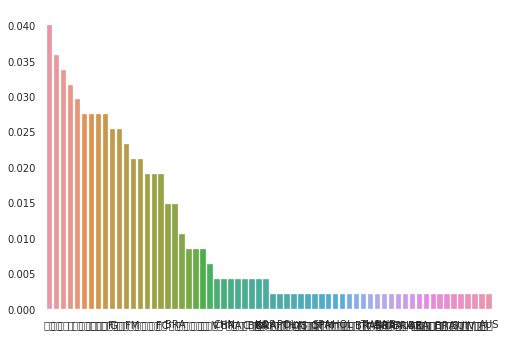

------------------------------------------------------------
prev1_team_prev_year
# of unique:  52
statistics:  count     321
unique     52
top        神戸
freq       19
Name: prev1_team_prev_year, dtype: object
value_counts: 


NaN            0.321353
神戸             0.040169
広島             0.038055
磐田             0.035941
新潟             0.035941
柏              0.035941
名古屋            0.035941
川崎F            0.033827
鳥栖             0.033827
鹿島             0.031712
仙台             0.031712
甲府             0.029598
福岡             0.029598
大宮             0.029598
浦和             0.029598
湘南             0.029598
横浜FM           0.025370
G大阪            0.023256
FC東京           0.019027
千葉             0.014799
熊本             0.006342
松本             0.006342
KOR            0.004228
BRA・BRA        0.004228
長崎             0.004228
栃木             0.004228
山形             0.004228
京都             0.004228
C大阪            0.004228
清水             0.004228
大分             0.002114
アスルクラロ沼津       0.002114
YS横浜FM         0.002114
BRA・福岡         0.002114
CHN            0.002114
愛媛             0.002114
THA            0.002114
水戸             0.002114
柏・神戸           0.002114
鹿島・山形          0.002114
岐阜             0.002114
BRA・BRA・BRA    0

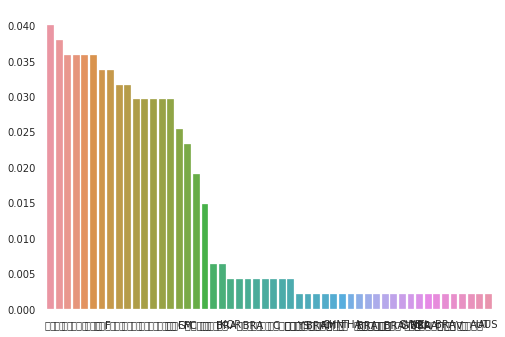

------------------------------------------------------------
prev3_div_prev_year
# of unique:  4
statistics:  count     260
unique      4
top         1
freq      164
Name: prev3_div_prev_year, dtype: object
value_counts: 


NaN    0.450317
1      0.346723
2      0.145877
9      0.052854
4      0.004228
Name: prev3_div_prev_year, dtype: float64

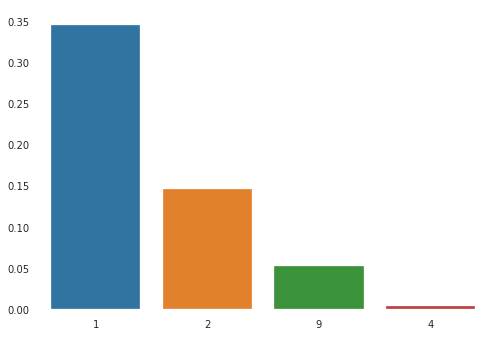

------------------------------------------------------------
prev2_div_prev_year
# of unique:  5
statistics:  count     297
unique      5
top         1
freq      205
Name: prev2_div_prev_year, dtype: object
value_counts: 


1      0.433404
NaN    0.372093
2      0.143763
9      0.046512
3      0.002114
4      0.002114
Name: prev2_div_prev_year, dtype: float64

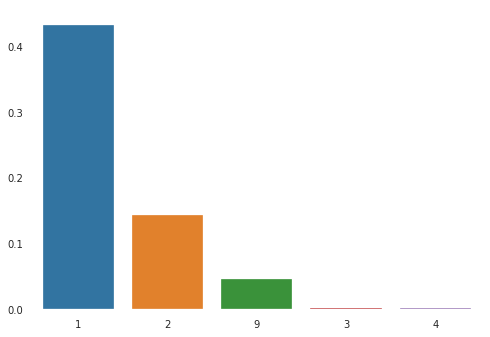

------------------------------------------------------------
prev1_div_prev_year
# of unique:  5
statistics:  count     321
unique      5
top         1
freq      236
Name: prev1_div_prev_year, dtype: object
value_counts: 


1      0.498943
NaN    0.321353
2      0.147992
9      0.025370
3      0.004228
4      0.002114
Name: prev1_div_prev_year, dtype: float64

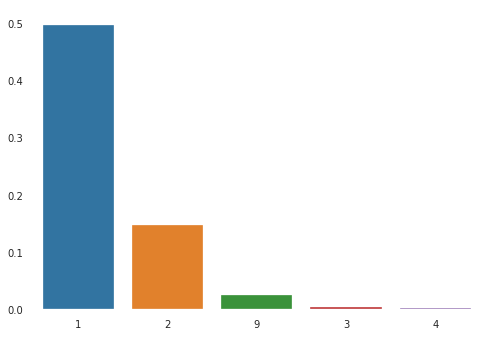

------------------------------------------------------------
prev3_num_played_prev_year
# of unique:  41
statistics:  count     259
unique     41
top         0
freq       20
Name: prev3_num_played_prev_year, dtype: object
value_counts: 


NaN    0.452431
0      0.042283
33     0.029598
32     0.027484
34     0.025370
20     0.023256
10     0.021142
1      0.019027
25     0.016913
29     0.016913
28     0.016913
15     0.016913
21     0.016913
16     0.014799
11     0.014799
26     0.014799
27     0.014799
17     0.012685
7      0.012685
40     0.012685
23     0.012685
12     0.012685
19     0.010571
2      0.010571
39     0.010571
31     0.010571
8      0.010571
37     0.010571
9      0.010571
30     0.010571
36     0.008457
22     0.008457
14     0.008457
13     0.008457
3      0.006342
18     0.006342
6      0.006342
24     0.004228
38     0.004228
35     0.002114
4      0.002114
5      0.002114
Name: prev3_num_played_prev_year, dtype: float64

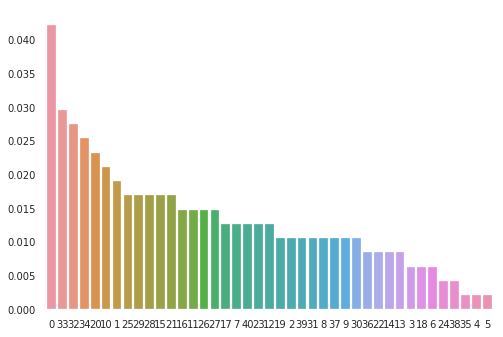

------------------------------------------------------------
prev2_num_played_prev_year
# of unique:  43
statistics:  count     296
unique     43
top         0
freq       33
Name: prev2_num_played_prev_year, dtype: object
value_counts: 


NaN    0.374207
0      0.069767
32     0.035941
34     0.029598
30     0.025370
33     0.025370
2      0.023256
31     0.023256
21     0.021142
28     0.019027
29     0.016913
1      0.016913
4      0.016913
25     0.014799
20     0.014799
38     0.014799
26     0.014799
22     0.012685
18     0.012685
7      0.012685
10     0.012685
11     0.012685
24     0.012685
16     0.012685
12     0.012685
3      0.010571
15     0.010571
14     0.010571
19     0.010571
41     0.010571
13     0.008457
42     0.008457
6      0.008457
35     0.008457
39     0.008457
17     0.008457
5      0.006342
37     0.006342
23     0.006342
8      0.004228
9      0.004228
36     0.004228
40     0.004228
27     0.002114
Name: prev2_num_played_prev_year, dtype: float64

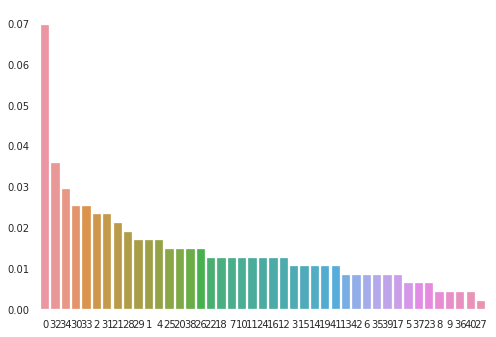

------------------------------------------------------------
prev1_num_played_prev_year
# of unique:  44
statistics:  count     320
unique     44
top         0
freq       38
Name: prev1_num_played_prev_year, dtype: object
value_counts: 


NaN    0.323467
0      0.080338
33     0.042283
31     0.031712
29     0.029598
34     0.027484
32     0.027484
30     0.023256
3      0.023256
28     0.021142
22     0.019027
5      0.019027
1      0.019027
26     0.019027
27     0.016913
21     0.016913
8      0.014799
2      0.014799
19     0.014799
24     0.014799
25     0.012685
4      0.012685
18     0.012685
23     0.010571
13     0.010571
12     0.010571
36     0.010571
20     0.010571
39     0.010571
11     0.010571
41     0.010571
15     0.008457
17     0.008457
14     0.008457
16     0.008457
10     0.006342
9      0.006342
7      0.006342
35     0.006342
6      0.004228
40     0.004228
38     0.004228
46     0.002114
42     0.002114
37     0.002114
Name: prev1_num_played_prev_year, dtype: float64

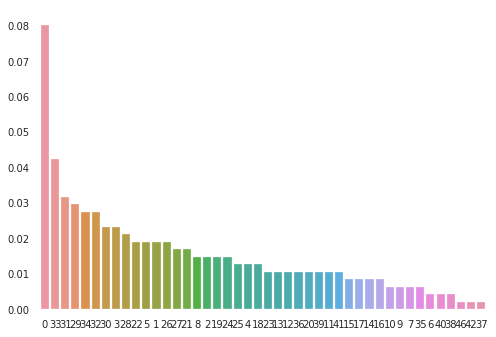

------------------------------------------------------------
prev3_scores_prev_year
# of unique:  20
statistics:  count     259
unique     20
top         0
freq      117
Name: prev3_scores_prev_year, dtype: object
value_counts: 


NaN    0.452431
0      0.247357
1      0.088795
2      0.061311
3      0.040169
4      0.031712
6      0.016913
5      0.010571
9      0.008457
8      0.006342
11     0.006342
7      0.006342
16     0.006342
13     0.002114
17     0.002114
15     0.002114
23     0.002114
26     0.002114
12     0.002114
20     0.002114
21     0.002114
Name: prev3_scores_prev_year, dtype: float64

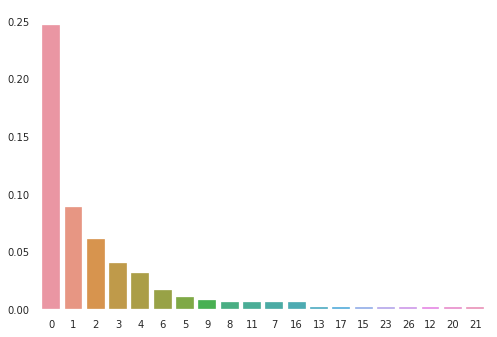

------------------------------------------------------------
prev2_scores_prev_year
# of unique:  20
statistics:  count     296
unique     20
top         0
freq      142
Name: prev2_scores_prev_year, dtype: object
value_counts: 


NaN    0.374207
0      0.300211
1      0.109937
3      0.048626
2      0.044397
6      0.025370
4      0.021142
5      0.019027
7      0.016913
8      0.010571
12     0.004228
15     0.004228
10     0.004228
13     0.002114
20     0.002114
16     0.002114
9      0.002114
17     0.002114
18     0.002114
11     0.002114
14     0.002114
Name: prev2_scores_prev_year, dtype: float64

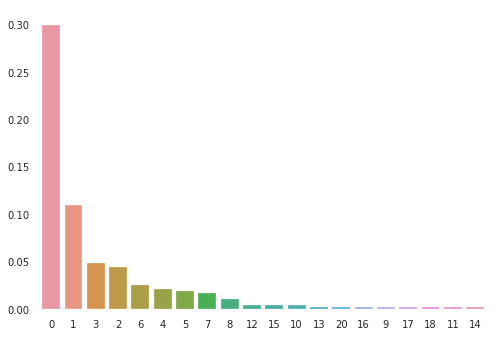

------------------------------------------------------------
prev1_scores_prev_year
# of unique:  19
statistics:  count     320
unique     19
top         0
freq      158
Name: prev1_scores_prev_year, dtype: object
value_counts: 


0      0.334038
NaN    0.323467
1      0.101480
2      0.061311
3      0.044397
4      0.035941
7      0.023256
8      0.019027
5      0.012685
6      0.010571
9      0.008457
10     0.008457
13     0.002114
20     0.002114
12     0.002114
16     0.002114
17     0.002114
23     0.002114
11     0.002114
14     0.002114
Name: prev1_scores_prev_year, dtype: float64

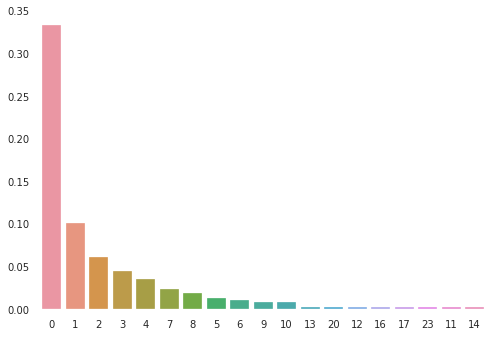

------------------------------------------------------------
prev3_time_played_prev_year
# of unique:  201
statistics:  count     233
unique    201
top         0
freq       20
Name: prev3_time_played_prev_year, dtype: object
value_counts: 


NaN     0.507400
0       0.042283
3060    0.010571
90      0.006342
721     0.004228
          ...   
523     0.002114
3049    0.002114
457     0.002114
1528    0.002114
1907    0.002114
Name: prev3_time_played_prev_year, Length: 202, dtype: float64

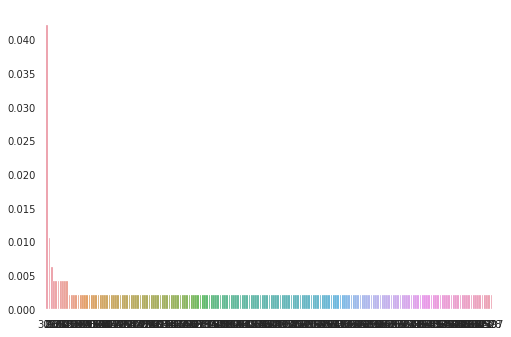

------------------------------------------------------------
prev2_time_played_prev_year
# of unique:  221
statistics:  count     273
unique    221
top         0
freq       33
Name: prev2_time_played_prev_year, dtype: object
value_counts: 


NaN     0.422833
0       0.069767
3060    0.012685
982     0.004228
36      0.004228
          ...   
2661    0.002114
769     0.002114
90      0.002114
815     0.002114
1137    0.002114
Name: prev2_time_played_prev_year, Length: 222, dtype: float64

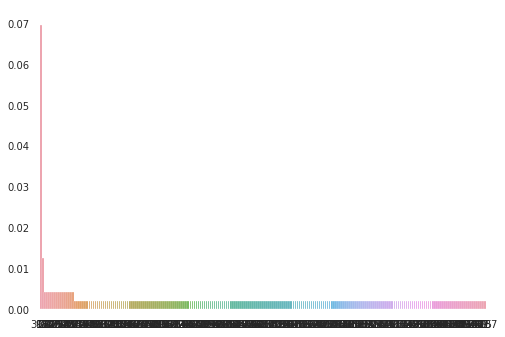

------------------------------------------------------------
prev1_time_played_prev_year
# of unique:  252
statistics:  count     308
unique    252
top         0
freq       38
Name: prev1_time_played_prev_year, dtype: object
value_counts: 


NaN     0.348837
0       0.080338
3060    0.010571
2970    0.006342
2880    0.004228
          ...   
3482    0.002114
2196    0.002114
2596    0.002114
1592    0.002114
2160    0.002114
Name: prev1_time_played_prev_year, Length: 253, dtype: float64

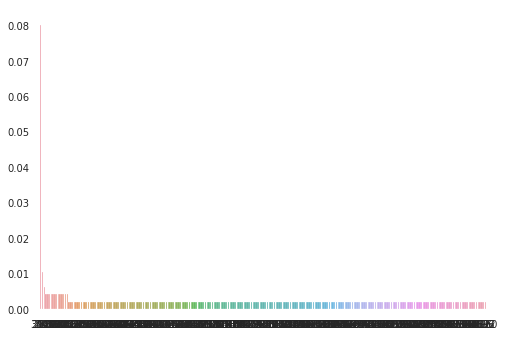

------------------------------------------------------------
time_played_prev_year
# of unique:  260
statistics:  count     329.000000
mean     1151.844985
std       997.290673
min         0.000000
25%       180.000000
50%       927.000000
75%      2050.000000
max      3060.000000
Name: time_played_prev_year, dtype: float64


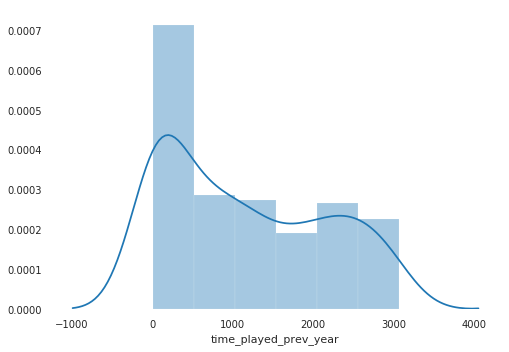

------------------------------------------------------------


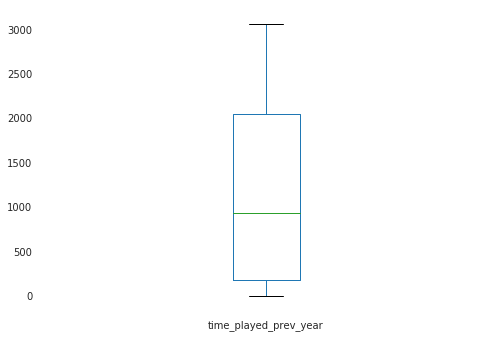

------------------------------------------------------------
kfold
# of unique:  5
statistics:  count    473.000000
mean       1.993658
std        1.414948
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: kfold, dtype: float64


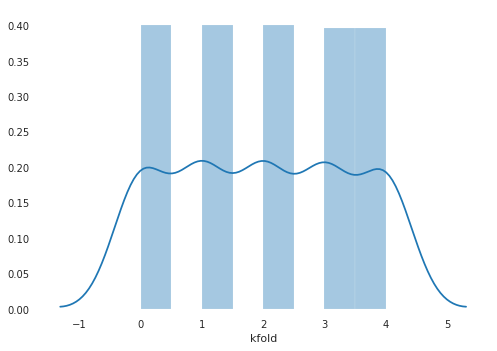

------------------------------------------------------------


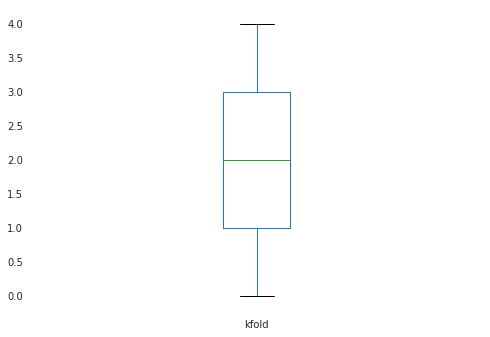

In [29]:
# 中身の確認
for col in df.columns:
    print('-'*60)
    print(col)
    print('# of unique: ', df[col].nunique())
    print('statistics: ', df[col].describe())
    if df[col].dtype=='object':
        print('value_counts: ')
        val_cnt = df[col].value_counts(dropna=False, normalize=True).sort_values(ascending=False)
        display(val_cnt)
        sns.barplot(x=val_cnt.index, y=val_cnt.values)
        plt.show()
        
    else:
        sns.distplot(df[col].dropna())
        plt.show()
        
        # 箱ひげ図
        print('-'*60)
        df[col].plot.box()
        plt.show()

#         # log10
#         df_rm0 =df[df[col]!=0][col]
#         sns.distplot(np.log10(df_rm0).dropna())
#         plt.show()

In [30]:
# 目的変数との相関
corr_list = []
col_list = []
target = 'time_played'
for col in df.select_dtypes(include='number').columns:
    if col not in [target]:
        col_list.append(col)
        corr_list.append(np.corrcoef(df[col], df[target])[0,1])
df_corr = pd.DataFrame({'feature': col_list, 'corr_with_object': corr_list}).sort_values(by='corr_with_object', ascending=False)
display('目的変数との相関: ', df_corr.head(20))

KeyError: 'time_played'